<a href="https://colab.research.google.com/github/ZahraAlipour703/breast-cancer-prediction-using-machine-learning/blob/main/breast_cancer_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#breast cancer prediction using machine learning project.
**by:** *Zahra Alipour*
[Linkedin](https://www.linkedin.com/in/zahraalipour703)
**Email: z.alipour7034891@gmail.com**

The Breast Cancer Diagnosis Dataset from the University of Wisconsin is a well-known dataset in machine learning for classification tasks.

**Objective Statement**: The objective of the Breast Cancer Diagnosis Dataset is to predict whether a tumor is benign or malignant based on various features.
Breast Cancer Detection Dataset **Overview**: This dataset contains features computed from digitized images of fine needle aspirates (FNA) of breast masses. These features describe characteristics of cell nuclei present in the image.
**Key Attributes**:

1.Demographic Information: This may include age, gender, and other relevant demographic details of the patients.
2.Medical History: Information about the patient's medical history, such as previous cancer diagnoses or family history of cancer.
3.Laboratory Test Results: Results of laboratory tests conducted on the samples, which can include various measurements and characteristics of cell nuclei.
4.Other Attributes: Additional features that describe the characteristics of cell nuclei in the images, such as radius, texture, perimeter, area, smoothness, compactness, concavity, symmetry, and fractal dimension.

**Objective of Breast Cancer Detection**: The main objective of using this dataset is to develop machine learning models that can accurately classify breast tumors as benign or malignant based on the provided features. This can aid in early detection and diagnosis of breast cancer, potentially leading to better treatment outcomes for patients.

In [162]:
#Data analysis libraries
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 100) # Show all columns when looking at dataframe
import warnings
warnings.filterwarnings('ignore')

# libraries for models
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from pandas.core.common import random_state
# metrics evaluation libraries
from sklearn.metrics import auc, classification_report, confusion_matrix, roc_curve, RocCurveDisplay,accuracy_score
from sklearn.metrics import  precision_recall_curve, precision_score, f1_score,confusion_matrix
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
#preprocess libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
#RFE
from sklearn.feature_selection import RFE
#C-B
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
#F-importance
from sklearn.ensemble import RandomForestClassifier
#MUTUAL-info
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import mutual_info_regression
#visulization libraries
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.offline as py
from plotly.offline import iplot, init_notebook_mode
from plotly.graph_objs import  Scatter
py.init_notebook_mode(connected=True)
from matplotlib import legend
import random

#Data Exploration

data loading

In [163]:
data= pd.read_csv('https://raw.githubusercontent.com/Muhd-Shahid/Breast-Cancer-Wisconsin/master/data_breast-cancer-wiscons.csv')

initial analysis

In [164]:
data.shape

(569, 33)

In [165]:
data.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  fractal_dimension_mean  radius_se  texture_se  perimeter_se  \
0         0.2419                 0.07871     1.0950      0.9053         8.589   
1         0.1812                 0.05667     0.5435      0.7339         3.398   
2         0.2069                 0.05999     0.7456      0.7869         4.585   
3         0.2597                 0.09744     0.4956      1.1560         3.445   
4         0.1809                 0.05883     0.7572      0.7813         5.438   

   area_se  smoothness_se  compactness_se  concavity_se  concave points_se  \
0   153.40       0.006399         0.04904       0.05373            0.01587   
1    74.08       0.005225         0.01308       0.01860            0.01340   
2    94.03       0.006150         0.04006       0.03832            0.02058   
3    27.23       0.009110         0.07458       0.05661            0.01867   
4    94.44       0.011490         0.02461       0.05688            0.01885   

   symmetry_se  fractal_dimension_se  radius_worst  texture_worst  \
0      0.03003              0.006193         25.38          17.33   
1      0.01389              0.003532         24.99          23.41   
2      0.02250              0.004571         23.57          25.53   
3      0.05963              0.009208         14.91          26.50   
4      0.01756              0.005115         22.54          16.67   

   perimeter_worst  area_worst  smoothness_worst  compactness_worst  \
0           184.60      2019.0            0.1622             0.6656   
1           158.80      1956.0            0.1238             0.1866   
2           152.50      1709.0            0.1444             0.4245   
3            98.87       567.7            0.2098             0.8663   
4           152.20      1575.0            0.1374             0.2050   

   concavity_worst  concave points_worst  symmetry_worst  \
0           0.7119                0.2654          0.4601   
1           0.2416                0.1860          0.2750   
2           0.4504                0.2430          0.3613   
3           0.6869                0.2575          0.6638   
4           0.4000                0.1625          0.2364   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN

In [166]:
data.tail()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
564  926424         M        21.56         22.39          142.00     1479.0   
565  926682         M        20.13         28.25          131.20     1261.0   
566  926954         M        16.60         28.08          108.30      858.1   
567  927241         M        20.60         29.33          140.10     1265.0   
568   92751         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

     symmetry_mean  fractal_dimension_mean  radius_se  texture_se  \
564         0.1726                 0.05623     1.1760       1.256   
565         0.1752                 0.05533     0.7655       2.463   
566         0.1590                 0.05648     0.4564       1.075   
567         0.2397                 0.07016     0.7260       1.595   
568         0.1587                 0.05884     0.3857       1.428   

     perimeter_se  area_se  smoothness_se  compactness_se  concavity_se  \
564         7.673   158.70       0.010300         0.02891       0.05198   
565         5.203    99.04       0.005769         0.02423       0.03950   
566         3.425    48.55       0.005903         0.03731       0.04730   
567         5.772    86.22       0.006522         0.06158       0.07117   
568         2.548    19.15       0.007189         0.00466       0.00000   

     concave points_se  symmetry_se  fractal_dimension_se  radius_worst  \
564            0.02454      0.01114              0.004239        25.450   
565            0.01678      0.01898              0.002498        23.690   
566            0.01557      0.01318              0.003892        18.980   
567            0.01664      0.02324              0.006185        25.740   
568            0.00000      0.02676              0.002783         9.456   

     texture_worst  perimeter_worst  area_worst  smoothness_worst  \
564          26.40           166.10      2027.0           0.14100   
565          38.25           155.00      1731.0           0.11660   
566          34.12           126.70      1124.0           0.11390   
567          39.42           184.60      1821.0           0.16500   
568          30.37            59.16       268.6           0.08996   

     compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
564            0.21130           0.4107                0.2216          0.2060   
565            0.19220           0.3215                0.1628          0.2572   
566            0.30940           0.3403                0.1418          0.2218   
567            0.86810           0.9387                0.2650          0.4087   
568            0.06444           0.0000                0.0000          0.2871   

     fractal_dimension_worst  Unnamed: 32  
564                  0.07115          NaN  
565                  0.06637          NaN  
566                  0.07820          NaN  
567                  0.12400          NaN  
568                  0.07039          NaN

In [167]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [168]:
data.nunique()

id                         569
diagnosis                    2
radius_mean                456
texture_mean               479
perimeter_mean             522
area_mean                  539
smoothness_mean            474
compactness_mean           537
concavity_mean             537
concave points_mean        542
symmetry_mean              432
fractal_dimension_mean     499
radius_se                  540
texture_se                 519
perimeter_se               533
area_se                    528
smoothness_se              547
compactness_se             541
concavity_se               533
concave points_se          507
symmetry_se                498
fractal_dimension_se       545
radius_worst               457
texture_worst              511
perimeter_worst            514
area_worst                 544
smoothness_worst           411
compactness_worst          529
concavity_worst            539
concave points_worst       492
symmetry_worst             500
fractal_dimension_worst    535
Unnamed:

In [169]:
data.describe()

id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  fractal_dimension_mean   radius_se  texture_se  \
count     569.000000              569.000000  569.000000  569.000000   
mean        0.181162                0.062798    0.405172    1.216853   
std         0.027414                0.007060    0.277313    0.551648   
min         0.106000                0.049960    0.111500    0.360200   
25%         0.161900                0.057700    0.232400    0.833900   
50%         0.179200                0.061540    0.324200    1.108000   
75%         0.195700                0.066120    0.478900    1.474000   
max         0.304000                0.097440    2.873000    4.885000   

       perimeter_se     area_se  smoothness_se  compactness_se  concavity_se  \
count    569.000000  569.000000     569.000000      569.000000    569.000000   
mean       2.866059   40.337079       0.007041        0.025478      0.031894   
std        2.021855   45.491006       0.003003        0.017908      0.030186   
min        0.757000    6.802000       0.001713        0.002252      0.000000   
25%        1.606000   17.850000       0.005169        0.013080      0.015090   
50%        2.287000   24.530000       0.006380        0.020450      0.025890   
75%        3.357000   45.190000       0.008146        0.032450      0.042050   
max       21.980000  542.200000       0.031130        0.135400      0.396000   

       concave points_se  symmetry_se  fractal_dimension_se  radius_worst  \
count         569.000000   569.000000            569.000000    569.000000   
mean            0.011796     0.020542              0.003795     16.269190   
std             0.006170     0.008266              0.002646      4.833242   
min             0.000000     0.007882              0.000895      7.930000   
25%             0.007638     0.015160              0.002248     13.010000   
50%             0.010930     0.018730              0.003187     14.970000   
75%             0.014710     0.023480              0.004558     18.790000   
max             0.052790     0.078950              0.029840     36.040000   

       texture_worst  perimeter_worst   area_worst  smoothness_worst  \
count     569.000000       569.000000   569.000000        569.000000   
mean       25.677223       107.261213   880.583128          0.132369   
std         6.146258        33.602542   569.356993          0.022832   
min        12.020000        50.410000   185.200000          0.071170   
25%        21.080000        84.110000   515.300000          0.116600   
50%        25.410000        97.660000   686.500000          0.131300   
75%    

checking for unnecessary and missing values

In [170]:
data.duplicated().sum()

0

In [171]:
data.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [172]:
data.isnull().any()

id                         False
diagnosis                  False
radius_mean                False
texture_mean               False
perimeter_mean             False
area_mean                  False
smoothness_mean            False
compactness_mean           False
concavity_mean             False
concave points_mean        False
symmetry_mean              False
fractal_dimension_mean     False
radius_se                  False
texture_se                 False
perimeter_se               False
area_se                    False
smoothness_se              False
compactness_se             False
concavity_se               False
concave points_se          False
symmetry_se                False
fractal_dimension_se       False
radius_worst               False
texture_worst              False
perimeter_worst            False
area_worst                 False
smoothness_worst           False
compactness_worst          False
concavity_worst            False
concave points_worst       False
symmetry_w

In [173]:
data.drop(["id", "Unnamed: 32"], axis=1, inplace=True)

In [174]:
data.head()


diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0         M        17.99         10.38          122.80     1001.0   
1         M        20.57         17.77          132.90     1326.0   
2         M        19.69         21.25          130.00     1203.0   
3         M        11.42         20.38           77.58      386.1   
4         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  fractal_dimension_mean  radius_se  texture_se  perimeter_se  \
0         0.2419                 0.07871     1.0950      0.9053         8.589   
1         0.1812                 0.05667     0.5435      0.7339         3.398   
2         0.2069                 0.05999     0.7456      0.7869         4.585   
3         0.2597                 0.09744     0.4956      1.1560         3.445   
4         0.1809                 0.05883     0.7572      0.7813         5.438   

   area_se  smoothness_se  compactness_se  concavity_se  concave points_se  \
0   153.40       0.006399         0.04904       0.05373            0.01587   
1    74.08       0.005225         0.01308       0.01860            0.01340   
2    94.03       0.006150         0.04006       0.03832            0.02058   
3    27.23       0.009110         0.07458       0.05661            0.01867   
4    94.44       0.011490         0.02461       0.05688            0.01885   

   symmetry_se  fractal_dimension_se  radius_worst  texture_worst  \
0      0.03003              0.006193         25.38          17.33   
1      0.01389              0.003532         24.99          23.41   
2      0.02250              0.004571         23.57          25.53   
3      0.05963              0.009208         14.91          26.50   
4      0.01756              0.005115         22.54          16.67   

   perimeter_worst  area_worst  smoothness_worst  compactness_worst  \
0           184.60      2019.0            0.1622             0.6656   
1           158.80      1956.0            0.1238             0.1866   
2           152.50      1709.0            0.1444             0.4245   
3            98.87       567.7            0.2098             0.8663   
4           152.20      1575.0            0.1374             0.2050   

   concavity_worst  concave points_worst  symmetry_worst  \
0           0.7119                0.2654          0.4601   
1           0.2416                0.1860          0.2750   
2           0.4504                0.2430          0.3613   
3           0.6869                0.2575          0.6638   
4           0.4000                0.1625          0.2364   

   fractal_dimension_worst  
0                  0.11890  
1                  0.08902  
2                  0.08758  
3                  0.17300  
4                  0.07678

In [175]:
data['diagnosis'].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

In [176]:
data.loc[:,'diagnosis']

0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: diagnosis, Length: 569, dtype: object

In [177]:
data['diagnosis'].unique()

array(['M', 'B'], dtype=object)

#encoding diagnosis into binary --> 1:malignant 0:benign

In [178]:
LabelEncoder_dia=LabelEncoder()
data.iloc[:,0]=LabelEncoder_dia.fit_transform(data.iloc[:,0].values)

In [179]:
LabelEncoder_dia=LabelEncoder()
data['diagnosis'] = LabelEncoder_dia.fit_transform(data['diagnosis'])

In [180]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

#Data Visulization

In [181]:
def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-latest.min.js?noext',
            },
          });
        </script>
        '''))

we had categoried our data in 3 categories.

In [182]:
data_mean=data.iloc[:,0:11]
data_se=data.iloc[:,11:21]
data_worst=data.iloc[:,21:]

#Pair Plot

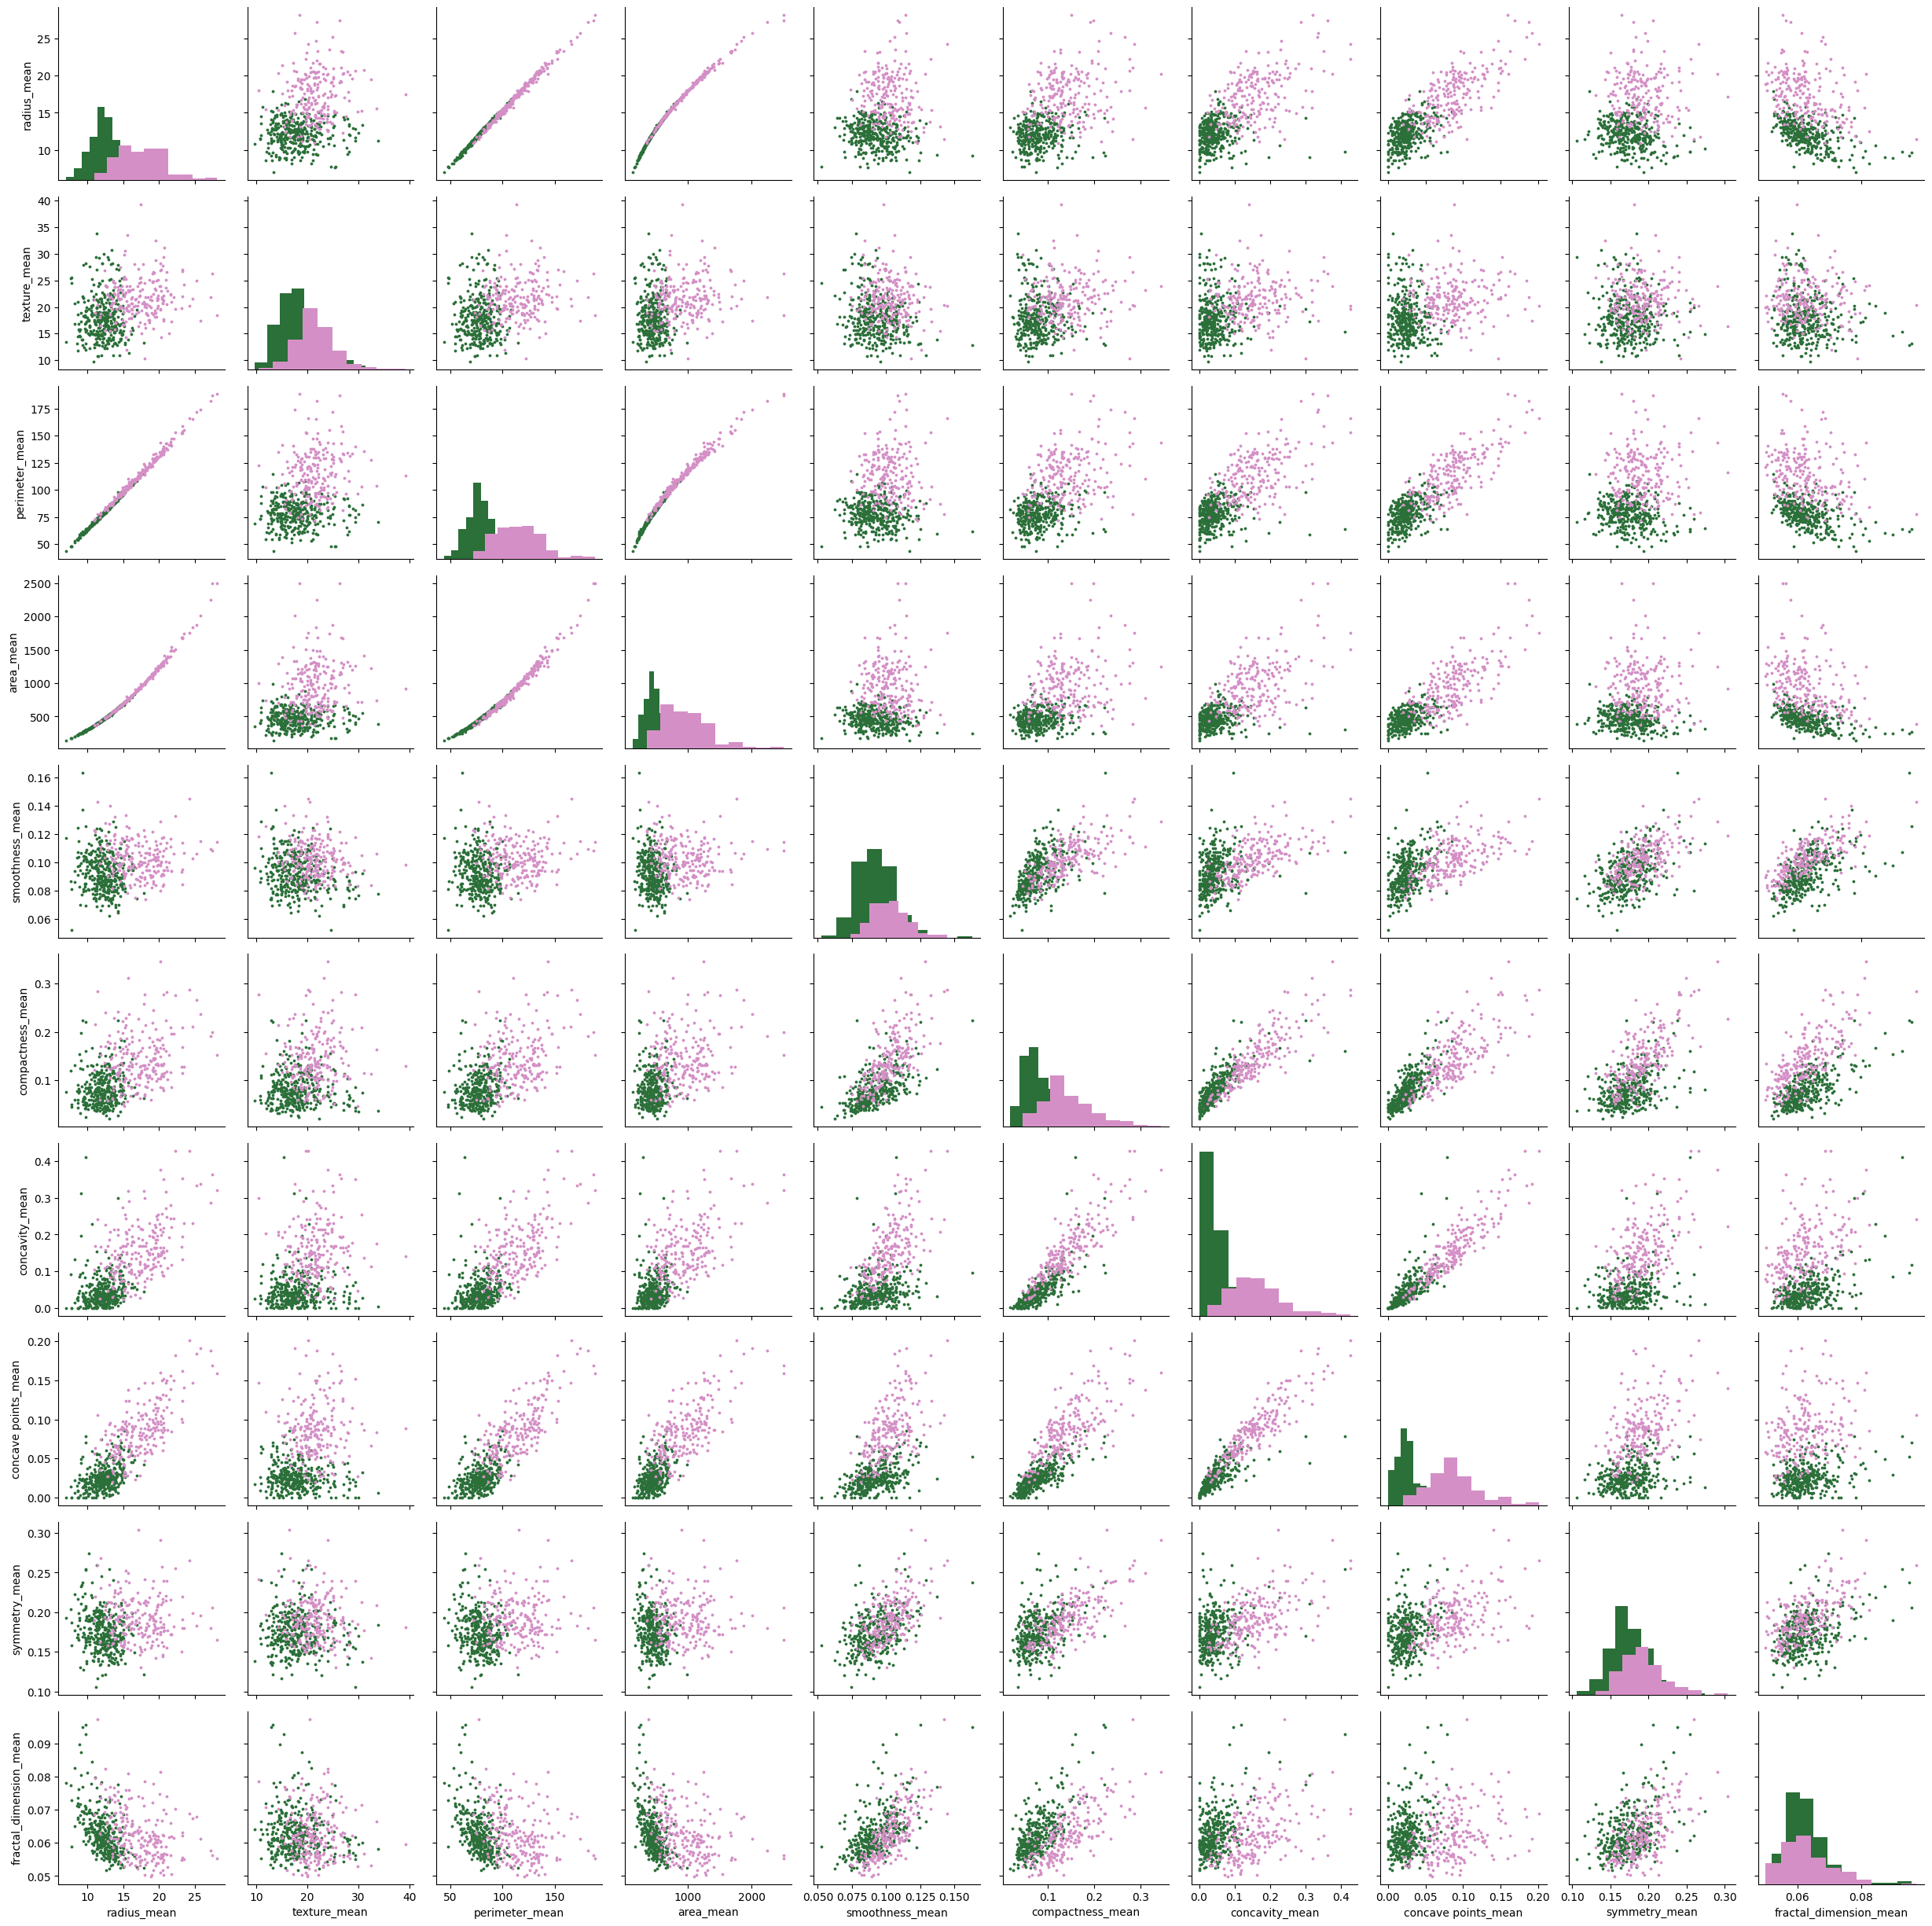

In [183]:
g = sns.PairGrid(data_mean, hue='diagnosis', palette='cubehelix')
g = g.map_diag(plt.hist)
g = g.map_offdiag(plt.scatter, s = 3)

values of cell radius, perimeter, area, compactness, concavity and concave points can be used in classification of the cancer. Larger values of these parameters tends to show a correlation with malignant tumors.

mean values of texture, smoothness, symmetry or fractual dimension does not show a particular preference of one diagnosis over the other.

#Bar Plot

In [184]:
# Bar chart of target value
configure_plotly_browser_state()
trace = go.Bar(x = data['diagnosis'].value_counts(), y = ['malignant', 'benign'], orientation = 'h', opacity = 0.5, marker=dict(
        color=[ 'violet', 'gray'],
        line=dict(color='#4c72b0',width=1.5)))

layout = dict(title =  'Count of diagnosis variable')
fig = dict(data = [trace], layout=layout)
py.iplot(fig)

#Pie Plot

In [185]:
# Pie chart of target value
configure_plotly_browser_state()
trace = go.Pie(labels = ['benign','malignant'], values = data['diagnosis'].value_counts(),
               textfont=dict(size=10), opacity = 0.9,
               marker=dict(colors=['hotpink','lightpurple'],
                           line=dict(color='#000000', width=0.3)))


layout = dict(title =  'Distribution of diagnosis variable')

fig = dict(data = [trace], layout=layout)
py.iplot(fig)

#Histogram Plot

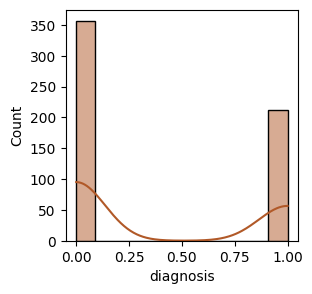

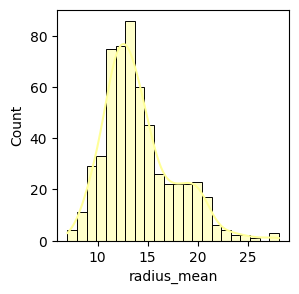

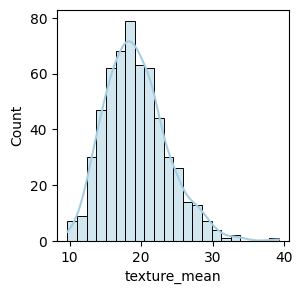

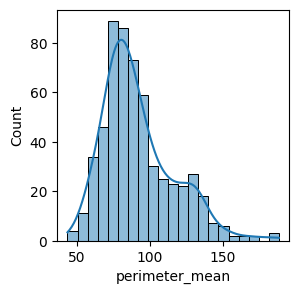

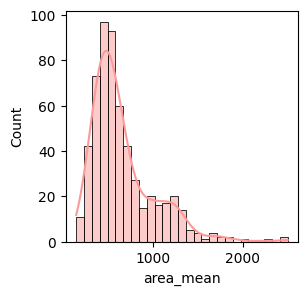

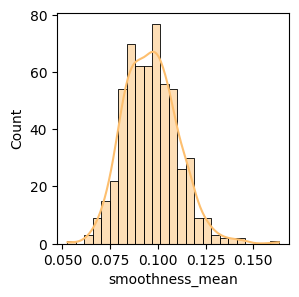

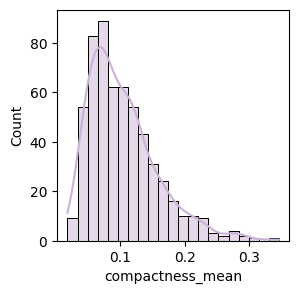

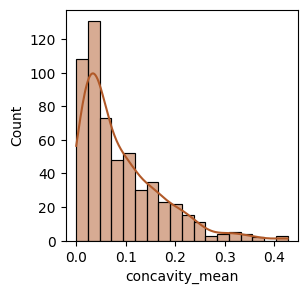

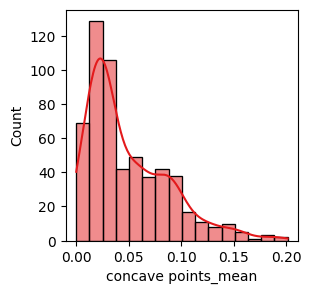

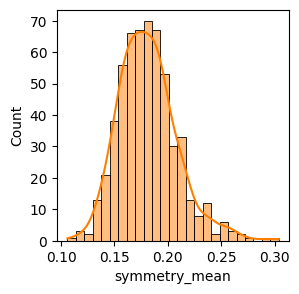

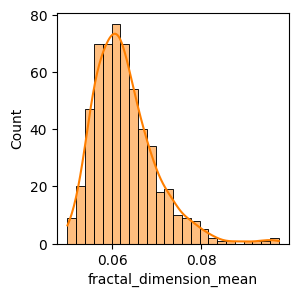

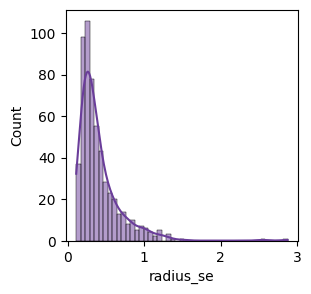

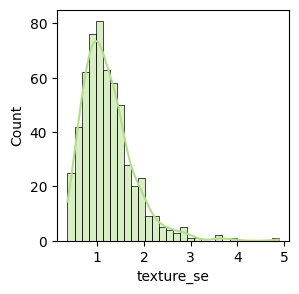

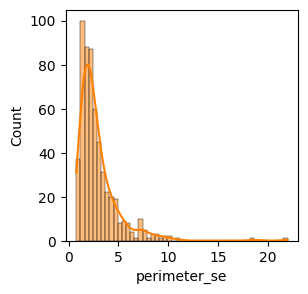

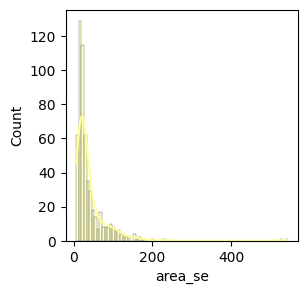

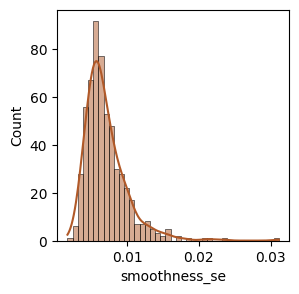

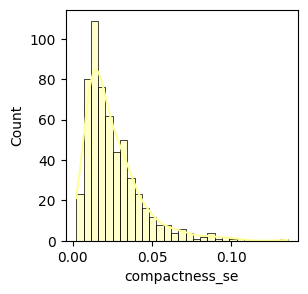

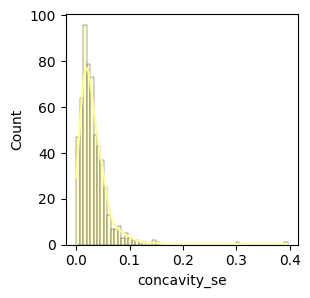

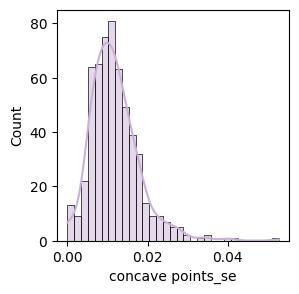

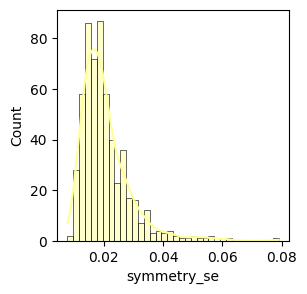

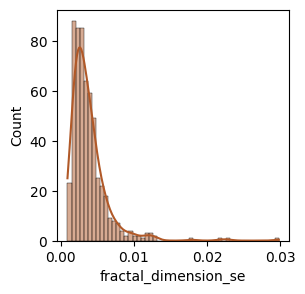

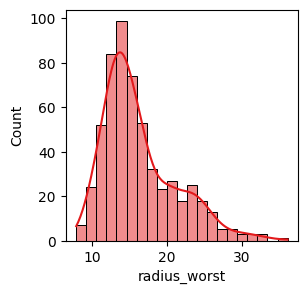

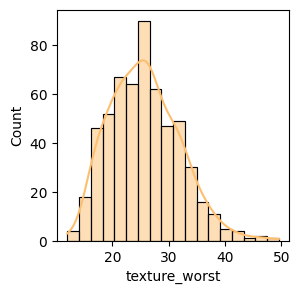

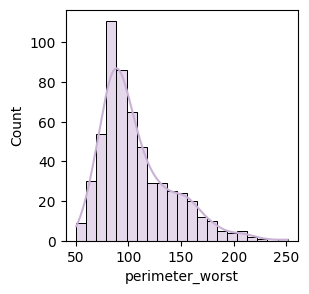

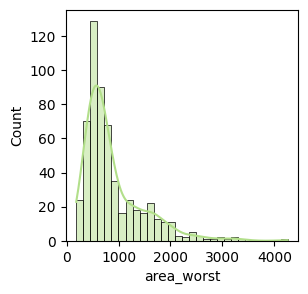

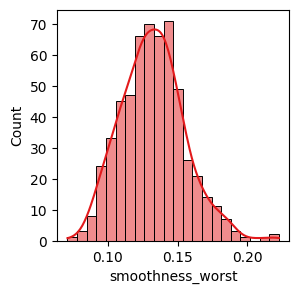

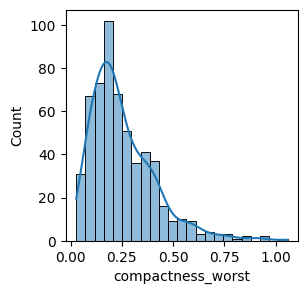

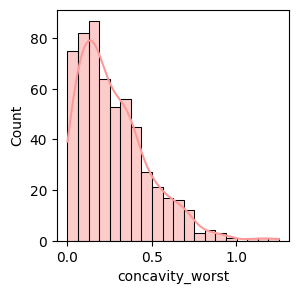

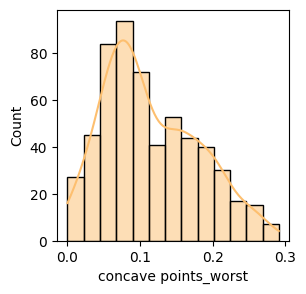

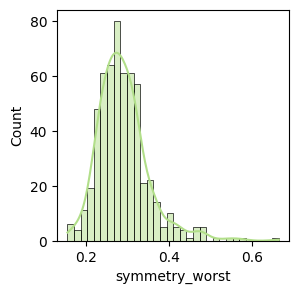

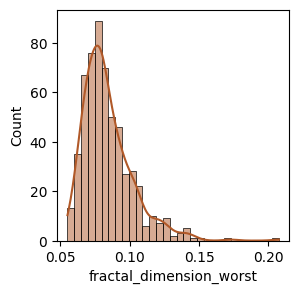

In [186]:
#histogtam plot for all data-features
color=sns.color_palette("Paired")
for i in data.columns:
  plt.figure(figsize=(3,3))
  sns.histplot(data[i],kde=True,palette='hls',color=random.choice(color),legend=True)
  plt.show()


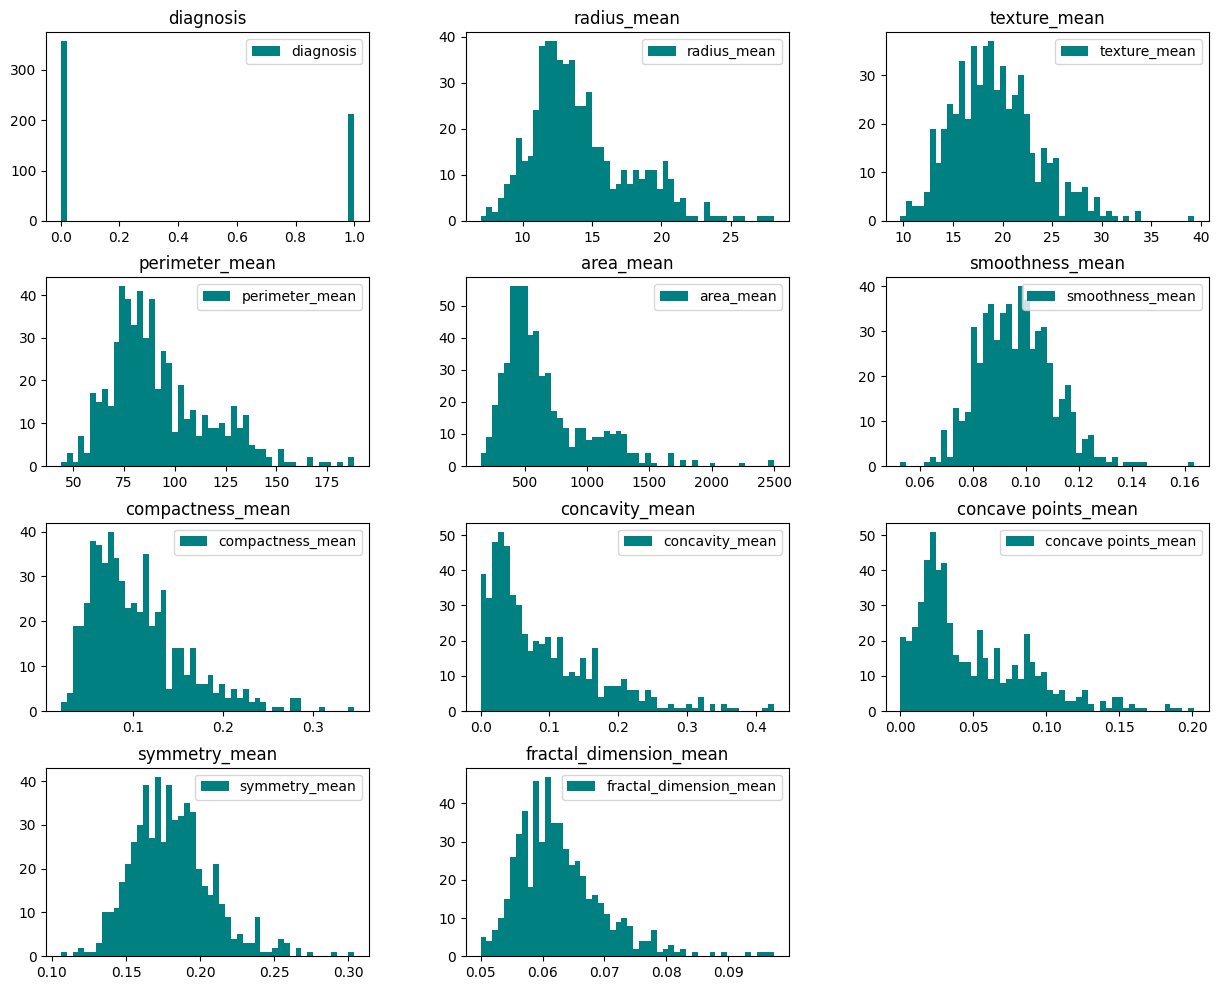

In [187]:
hist_data_min= data_mean.hist(bins=50,figsize=(15,12),color='teal', grid=False,legend=True)

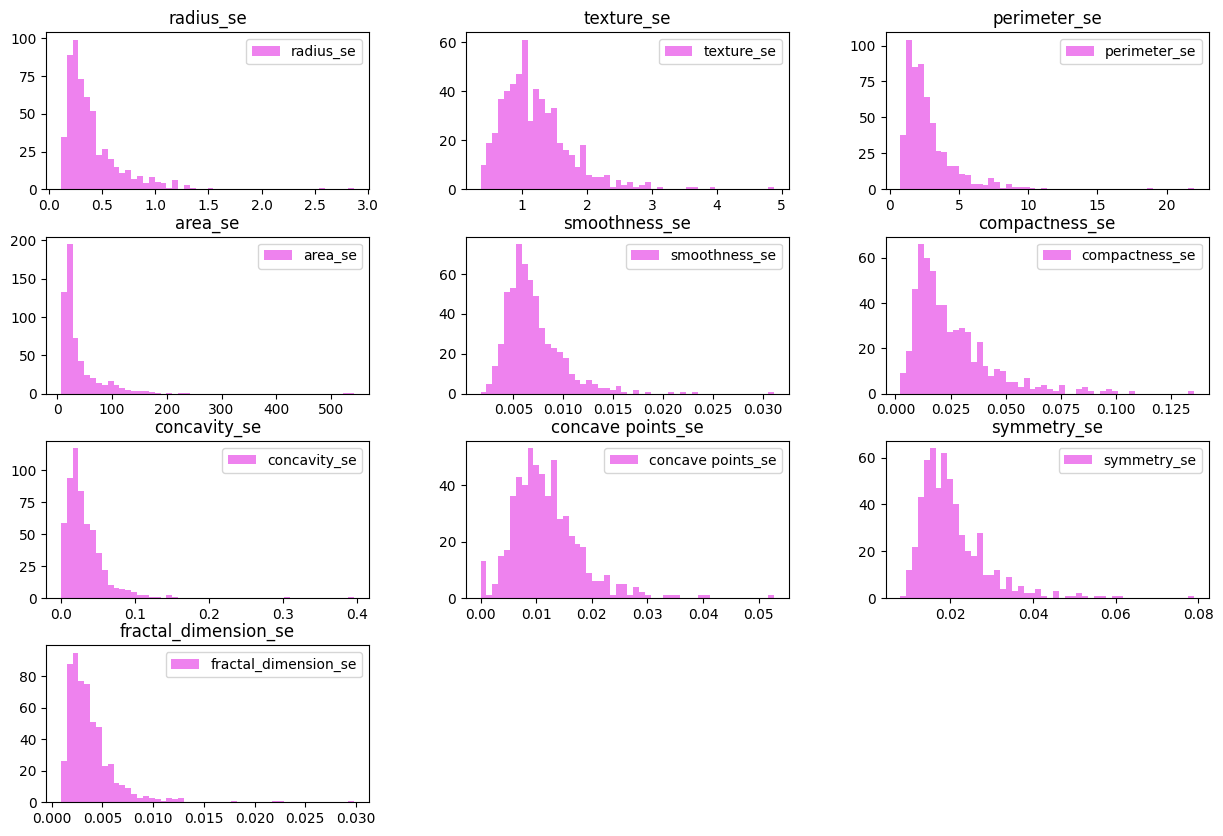

In [188]:
hist_data_se=data_se.hist(bins=50,legend=True, figsize=(15,10), grid=False,color='violet')

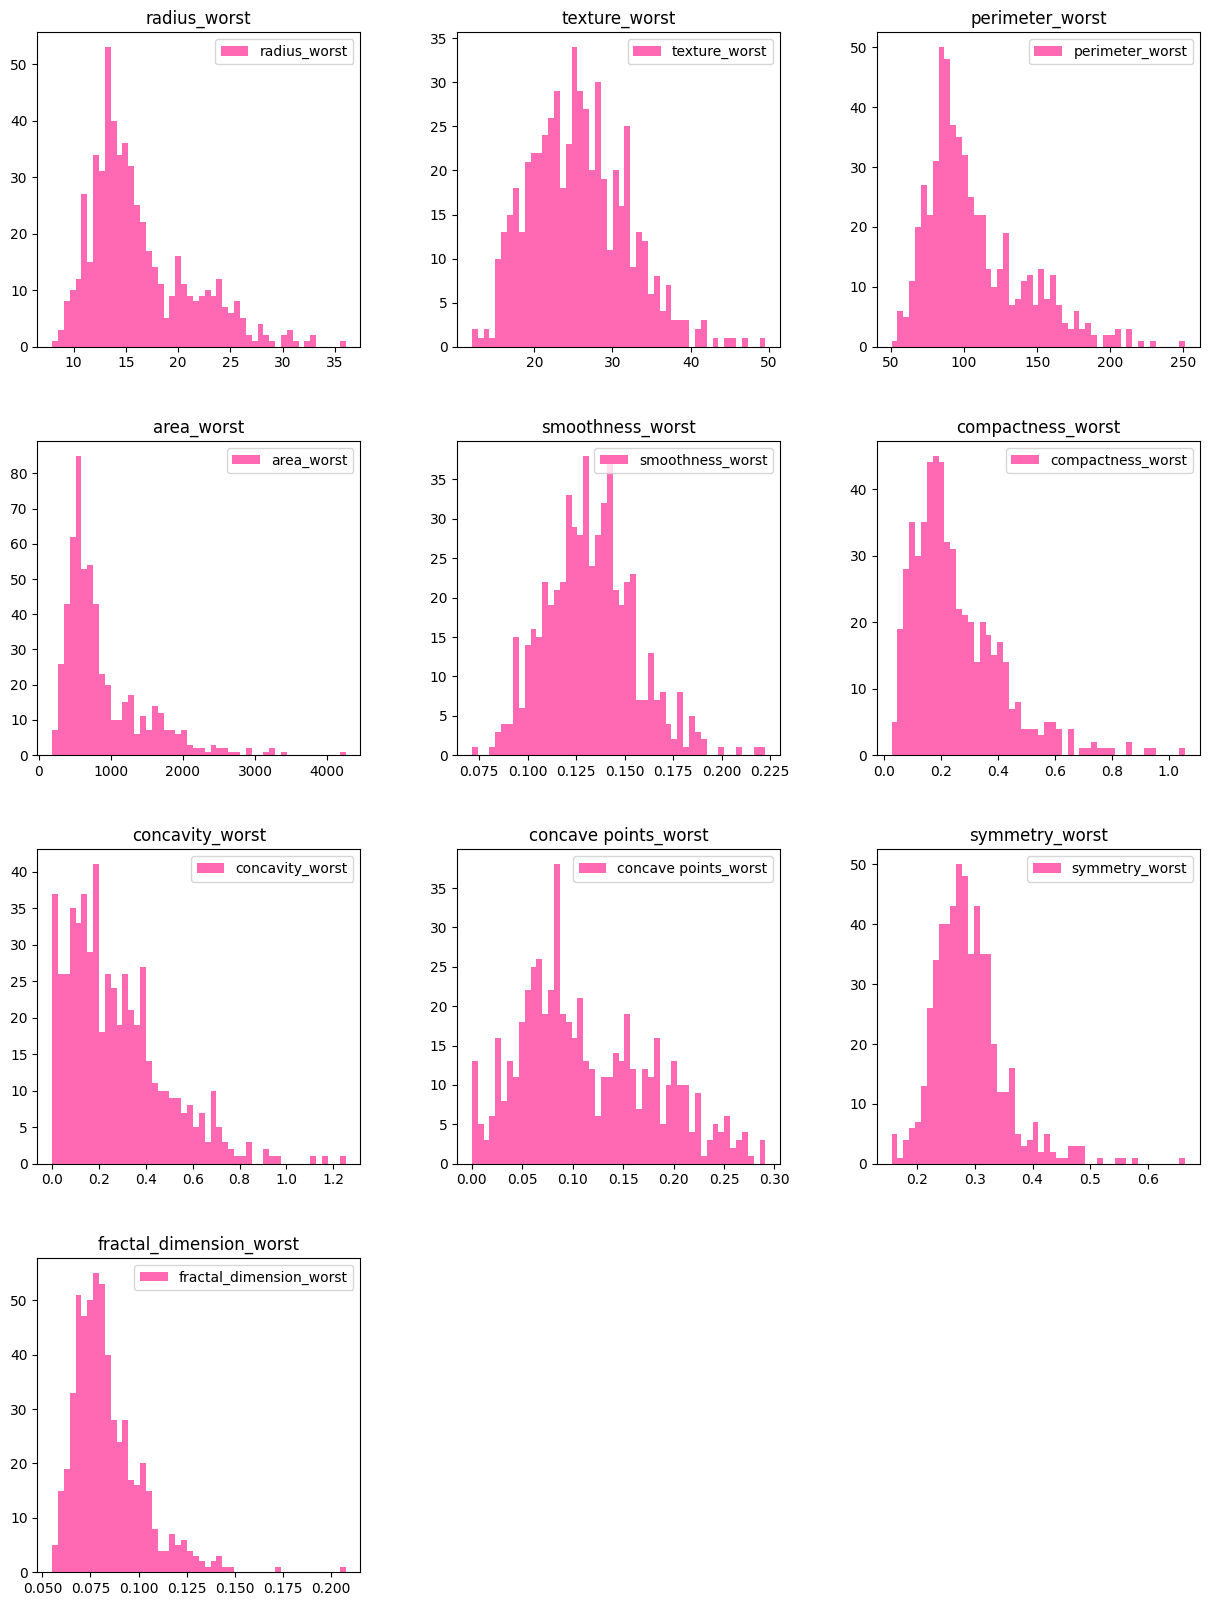

In [189]:
hist_data_worst=data_worst.hist(bins=50,figsize=(15,20),grid=False,legend=True,color='hotpink')

concavity,and concavity_point => exponential distribution
 texture and smooth and symmetry => Gaussian nearly Gaussian distibution

#finding the correlation beetwen data

In [190]:
#correlation
correlation = data.corr()
#tick labels
matrix_cols = correlation.columns.tolist()
#convert to array
corr_array  = np.array(correlation)
pd.DataFrame(corr_array)

0         1         2         3         4         5         6   \
0   1.000000  0.730029  0.415185  0.742636  0.708984  0.358560  0.596534   
1   0.730029  1.000000  0.323782  0.997855  0.987357  0.170581  0.506124   
2   0.415185  0.323782  1.000000  0.329533  0.321086 -0.023389  0.236702   
3   0.742636  0.997855  0.329533  1.000000  0.986507  0.207278  0.556936   
4   0.708984  0.987357  0.321086  0.986507  1.000000  0.177028  0.498502   
5   0.358560  0.170581 -0.023389  0.207278  0.177028  1.000000  0.659123   
6   0.596534  0.506124  0.236702  0.556936  0.498502  0.659123  1.000000   
7   0.696360  0.676764  0.302418  0.716136  0.685983  0.521984  0.883121   
8   0.776614  0.822529  0.293464  0.850977  0.823269  0.553695  0.831135   
9   0.330499  0.147741  0.071401  0.183027  0.151293  0.557775  0.602641   
10 -0.012838 -0.311631 -0.076437 -0.261477 -0.283110  0.584792  0.565369   
11  0.567134  0.679090  0.275869  0.691765  0.732562  0.301467  0.497473   
12 -0.008303 -0.097317  0.386358 -0.086761 -0.066280  0.068406  0.046205   
13  0.556141  0.674172  0.281673  0.693135  0.726628  0.296092  0.548905   
14  0.548236  0.735864  0.259845  0.744983  0.800086  0.246552  0.455653   
15 -0.067016 -0.222600  0.006614 -0.202694 -0.166777  0.332375  0.135299   
16  0.292999  0.206000  0.191975  0.250744  0.212583  0.318943  0.738722   
17  0.253730  0.194204  0.143293  0.228082  0.207660  0.248396  0.570517   
18  0.408042  0.376169  0.163851  0.407217  0.372320  0.380676  0.642262   
19 -0.006522 -0.104321  0.009127 -0.081629 -0.072497  0.200774  0.229977   
20  0.077972 -0.042641  0.054458 -0.005523 -0.019887  0.283607  0.507318   
21  0.776454  0.969539  0.352573  0.969476  0.962746  0.213120  0.535315   
22  0.456903  0.297008  0.912045  0.303038  0.287489  0.036072  0.248133   
23  0.782914  0.965137  0.358040  0.970387  0.959120  0.238853  0.590210   
24  0.733825  0.941082  0.343546  0.941550  0.959213  0.206718  0.509604   
25  0.421465  0.119616  0.077503  0.150549  0.123523  0.805324  0.565541   
26  0.590998  0.413463  0.277830  0.455774  0.390410  0.472468  0.865809   
27  0.659610  0.526911  0.301025  0.563879  0.512606  0.434926  0.816275   
28  0.793566  0.744214  0.295316  0.771241  0.722017  0.503053  0.815573   
29  0.416294  0.163953  0.105008  0.189115  0.143570  0.394309  0.510223   
30  0.323872  0.007066  0.119205  0.051019  0.003738  0.499316  0.687382   

          7         8         9         10        11        12        13  \
0   0.696360  0.776614  0.330499 -0.012838  0.567134 -0.008303  0.556141   
1   0.676764  0.822529  0.147741 -0.311631  0.679090 -0.097317  0.674172   
2   0.302418  0.293464  0.071401 -0.076437  0.275869  0.386358  0.281673   
3   0.716136  0.850977  0.183027 -0.261477  0.691765 -0.086761  0.693135   
4   0.685983  0.823269  0.151293 -0.283110  0.732562 -0.066280  0.726628   
5   0.521984  0.553695  0.557775  0.584792  0.301467  0.068406  0.296092   
6   0.883121  0.831135  0.602641  0.565369  0.497473  0.046205  0.548905   
7   1.000000  0.921391  0.500667  0.336783  0.631925  0.076218  0.660391   
8   0.921391  1.000000  0.462497  0.166917  0.698050  0.021480  0.710650   
9   0.500667  0.462497  1.000000  0.479921  0.303379  0.128053  0.313893   
10  0.336783  0.166917  0.479921  1.000000  0.000111  0.164174  0.039830   
11  0.631925  0.698050  0.303379  0.000111  1.000000  0.213247  0.972794   
12  0.076218  0.021480  0.128053  0.164174  0.213247  1.000000  0.223171   
13  0.660391  0.710650  0.313893  0.039830  0.972794  0.223171  1.000000   
14  0.617427  0.690299  0.223970 -0.090170  0.951830  0.111567  0.937655   
15  0.098564  0.027653  0.187321  0.401964  0.164514  0.397243  0.151075   
16  0.670279  0.490424  0.421659  0.559837  0.356065  0.231700  0.416322   
17  0.691270  0.439167  0.342627  0.446630  0.332358  0.194998  0.362482   
18  0.683260  0.615634  0.393298  0.341198  0.513346  0.230283  0.556264   
19  0.178009  0.095351  0.449137  0.345007  0.240567  0.4

In [191]:
#Heat map plot
configure_plotly_browser_state()
trace = go.Heatmap(z = corr_array,x = matrix_cols,y = matrix_cols,xgap = 2,ygap = 2,colorscale='Viridis',colorbar   = dict())
layout = go.Layout(dict(title = 'Correlation Matrix for variables', autosize = False,height  = 720,width   = 800,margin  = dict(r = 0 ,l = 210,
t = 25,b = 210),yaxis   = dict(tickfont = dict(size = 9)),xaxis   = dict(tickfont = dict(size = 9)),))
fig = go.Figure(data = [trace],layout = layout)
py.iplot(fig)

In [192]:
#finding skew of data
dskew=data.drop(['diagnosis'],axis=1)
pd.DataFrame(dskew.skew())

0
radius_mean              0.942380
texture_mean             0.650450
perimeter_mean           0.990650
area_mean                1.645732
smoothness_mean          0.456324
compactness_mean         1.190123
concavity_mean           1.401180
concave points_mean      1.171180
symmetry_mean            0.725609
fractal_dimension_mean   1.304489
radius_se                3.088612
texture_se               1.646444
perimeter_se             3.443615
area_se                  5.447186
smoothness_se            2.314450
compactness_se           1.902221
concavity_se             5.110463
concave points_se        1.444678
symmetry_se              2.195133
fractal_dimension_se     3.923969
radius_worst             1.103115
texture_worst            0.498321
perimeter_worst          1.128164
area_worst               1.859373
smoothness_worst         0.415426
compactness_worst        1.473555
concavity_worst          1.150237
concave points_worst     0.492616
symmetry_worst           1.433928
fractal_dimension_worst  1.662579

positive skew shows that all of the features are in the positive way of skew. and it shows that median is always bigger than the mean.

#Density Plot

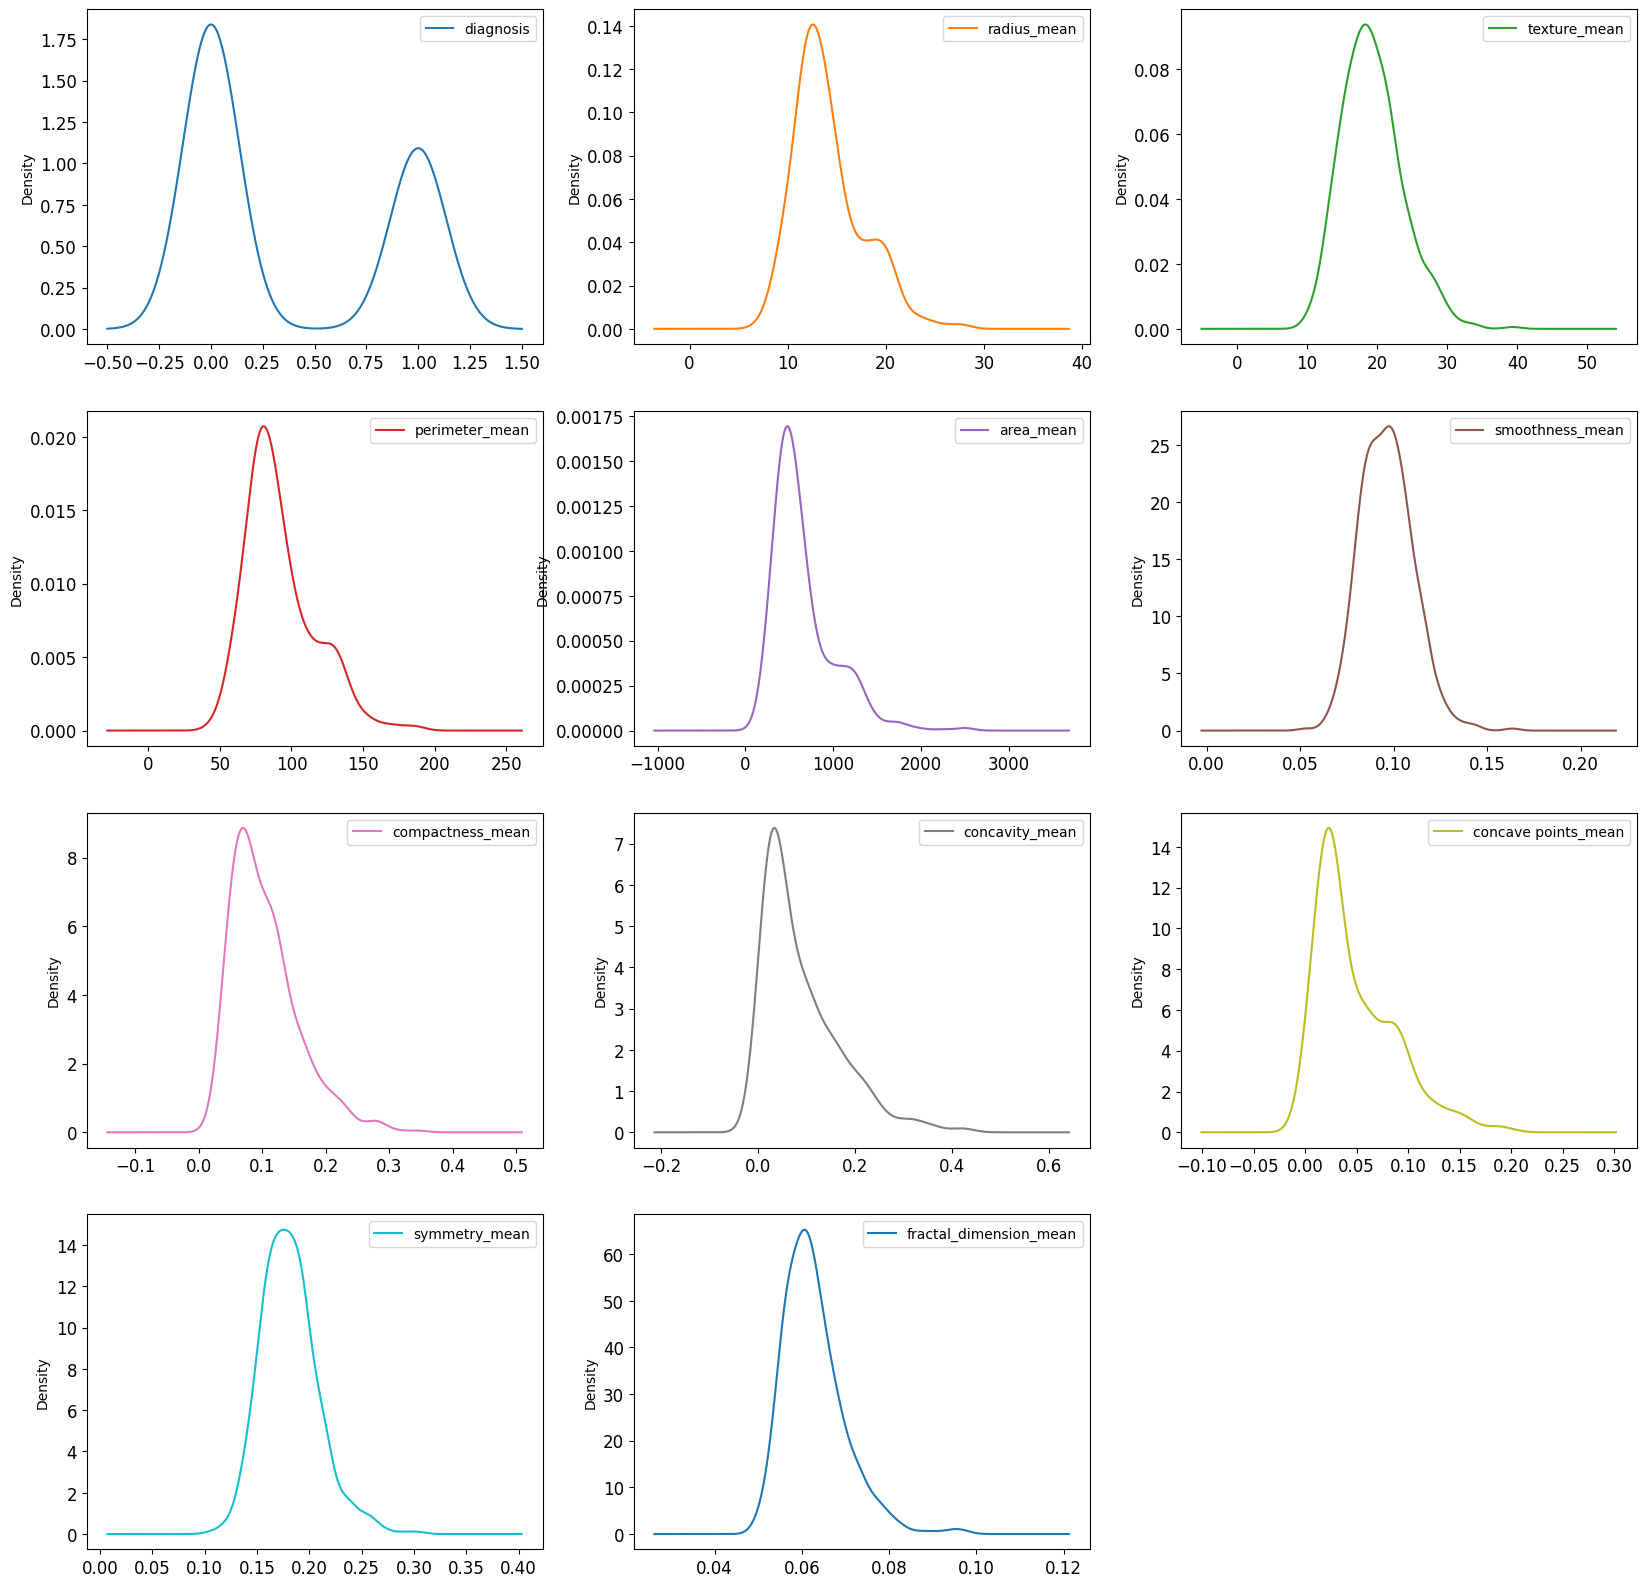

In [193]:
data_mean_density = data_mean.plot(kind= 'density', subplots=True, layout=(4,3), sharex=False,
                     sharey=False, fontsize=12, figsize=(20,20))

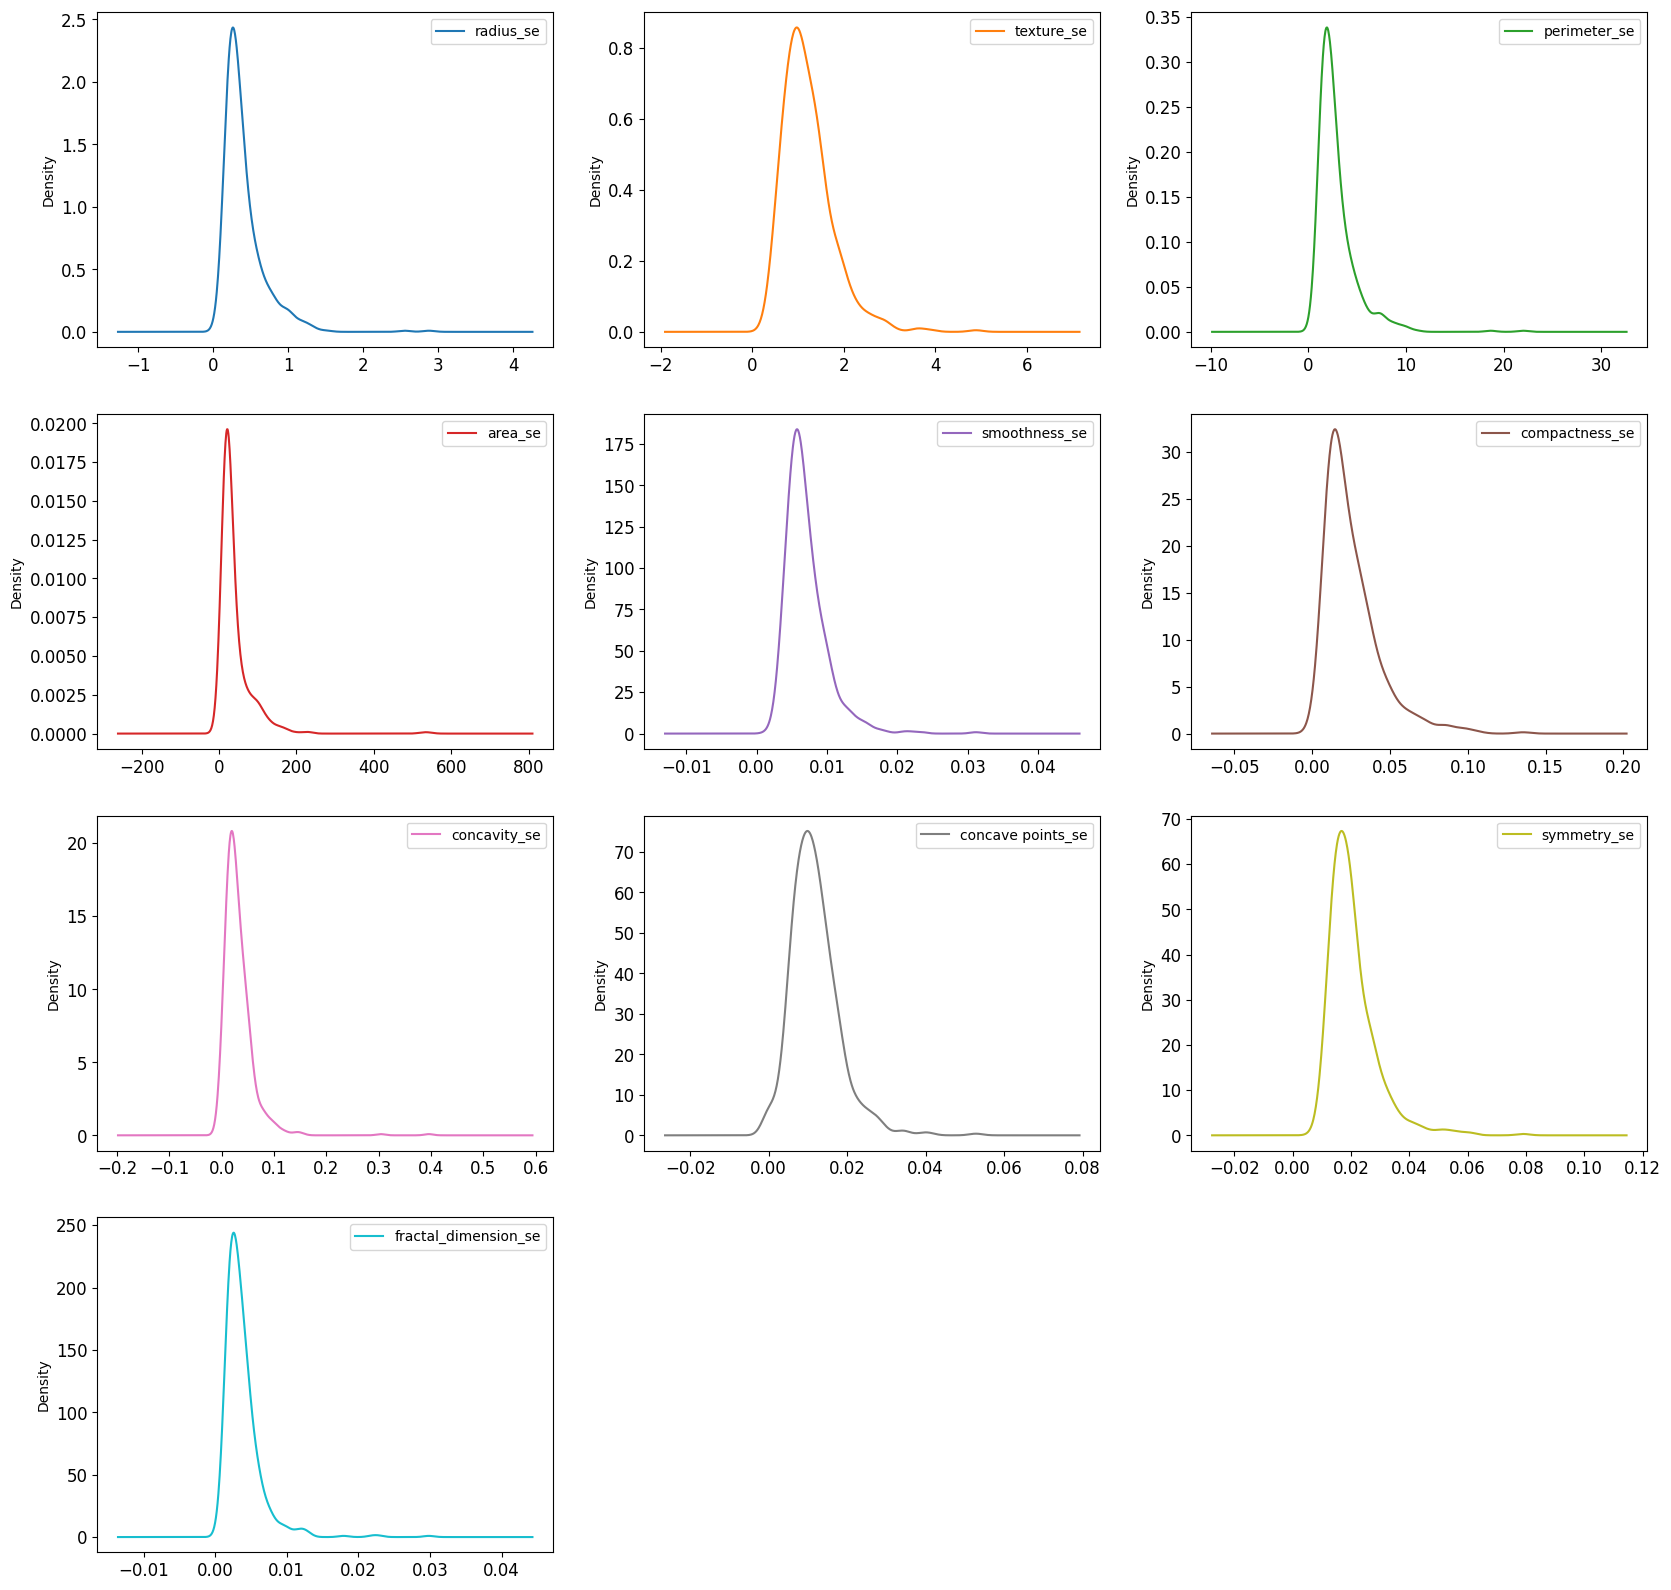

In [194]:
density_data_se= data_se.plot(kind= 'density', subplots=True, layout=(4,3), sharex=False,
                    sharey=False, fontsize=12, figsize=(20,20))

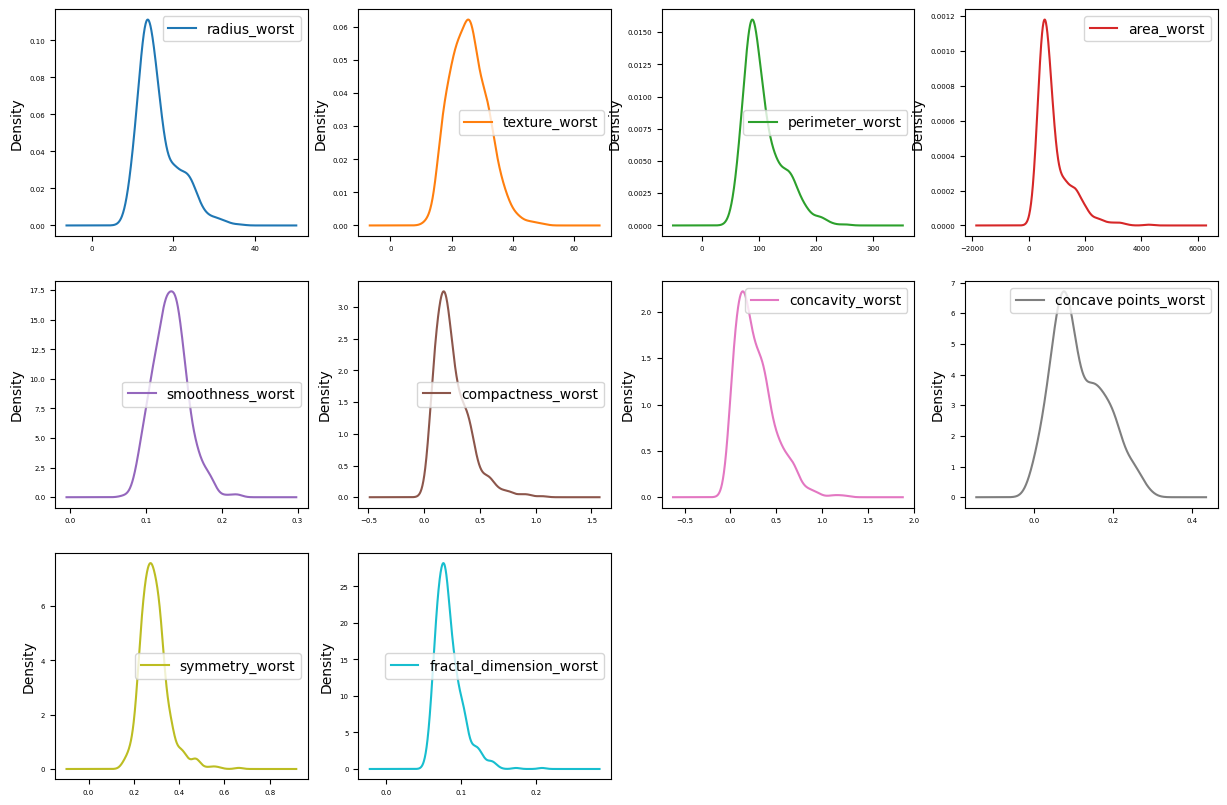

In [195]:
density_data_worst= data_worst.plot(kind= 'density', subplots=True, layout=(3,4), sharex=False, sharey=False,
                    fontsize=5, figsize=(15,10))

#Box plot

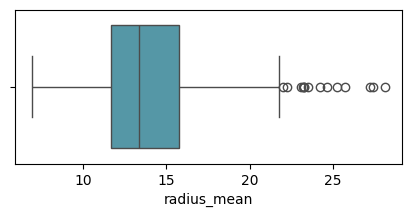

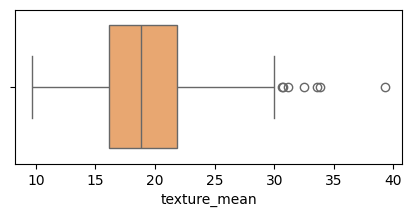

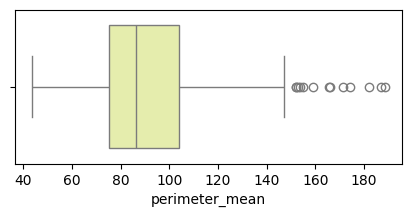

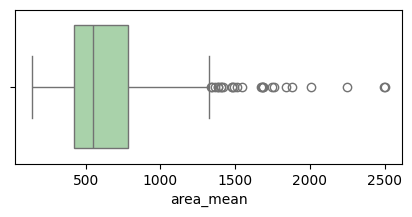

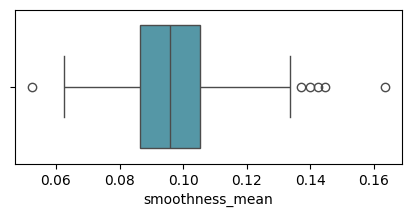

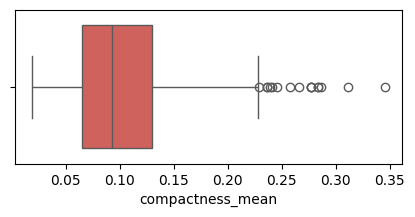

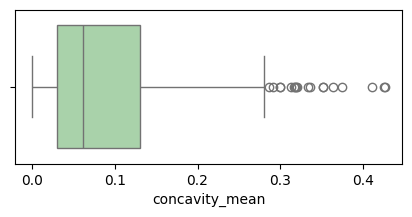

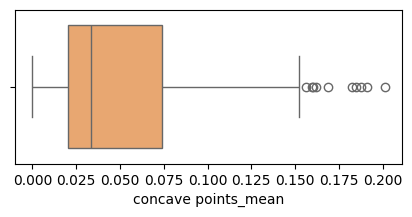

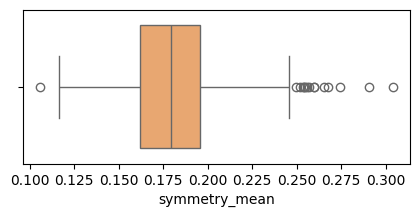

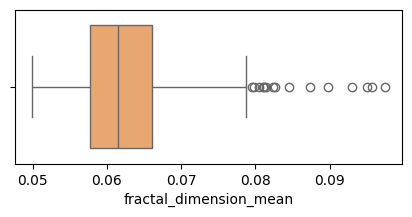

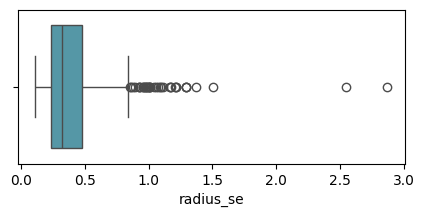

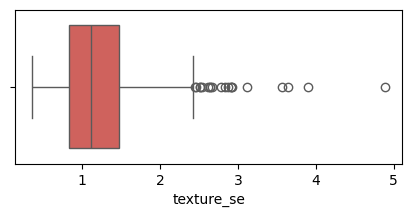

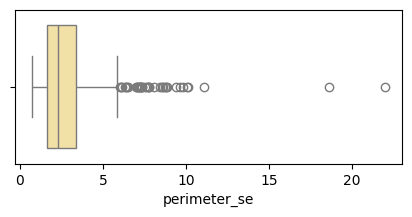

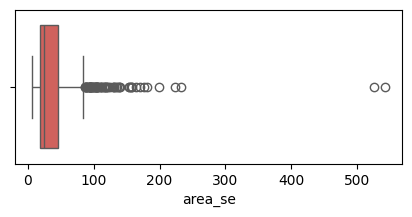

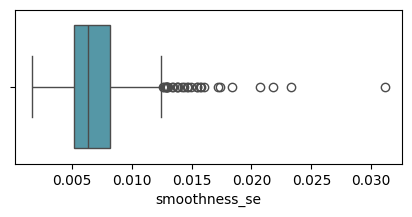

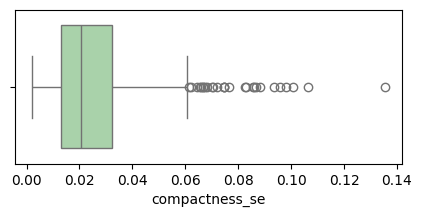

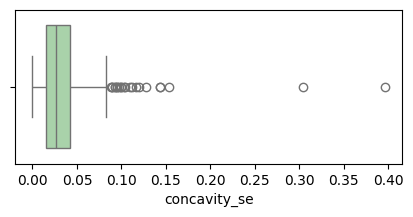

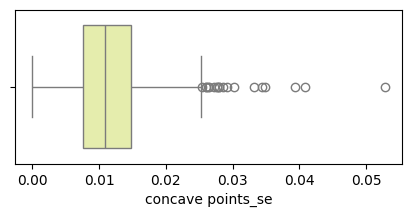

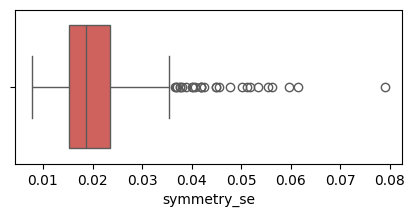

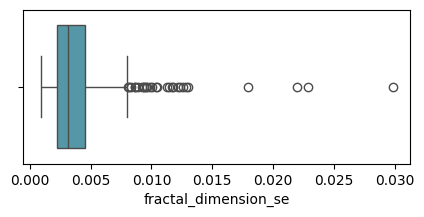

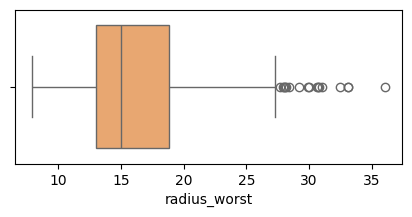

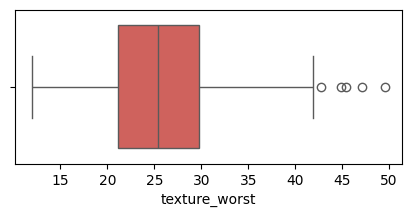

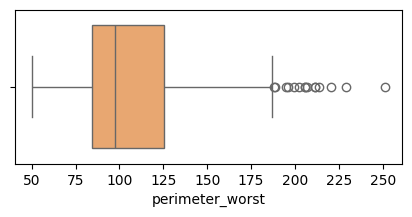

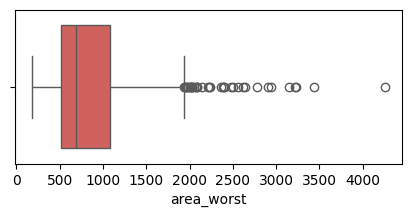

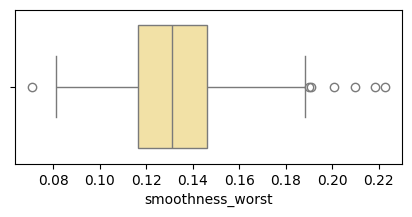

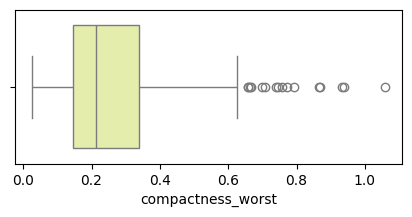

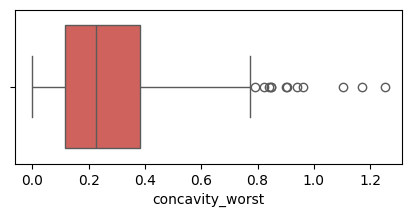

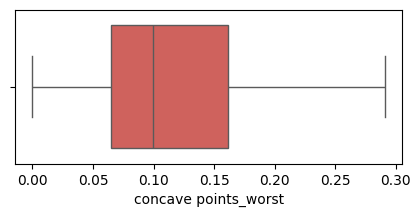

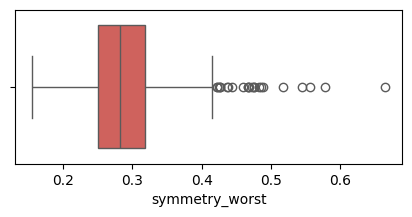

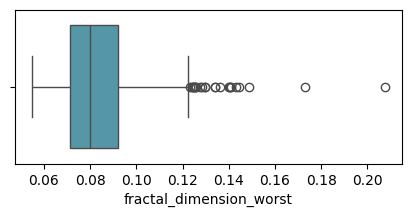

In [196]:
color=sns.color_palette("Spectral")
def boxPlot(dff):
    d = dff.drop(columns=['diagnosis'])
    for column in d:
        plt.figure(figsize=(5, 2))
        sns.boxplot(x=column, data=d,orient='v',color=random.choice(color))

boxPlot(data)

perimeter,radius, area, concavity, compactness=> exponential
texture and smooth and symmetry=> Gaussian or nearly Gaussian

#preprocessing
spliting data in to train and test sets
we put 70% data for train and 30% data for test

In [197]:
random_state=18
x=data.drop(columns='diagnosis')
y=data['diagnosis']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=random_state)
x_train.shape, x_test.shape , y_train.shape , y_test.shape

((398, 30), (171, 30), (398,), (171,))

#feature scaling(standrazition)
Standardization is a useful technique to transform attributes with a Gaussian distribution and differing means and standard deviations to a standard Gaussian distribution with a mean of 0 and a standard deviation of 1.

Let’s evaluate the same algorithms with a standardized copy of the dataset. Here, I use sklearn to scale and transform the data such that each attribute has a mean value of zero and a standard deviation of one

In [198]:
x_train=StandardScaler().fit_transform(x_train)
x_test=StandardScaler().fit_transform(x_test)
x_train

array([[ 1.01702624e-01, -8.29495600e-01,  5.08995783e-04, ...,
        -8.30592294e-01, -5.69477236e-01, -1.50886641e+00],
       [-1.78080673e+00,  1.53558890e+00, -1.76811217e+00, ...,
        -1.71430330e+00,  3.04904266e-01,  9.98473267e-01],
       [ 1.87450608e+00,  1.79623086e+00,  1.97962378e+00, ...,
         2.69893091e+00,  2.02717086e+00,  2.71336833e+00],
       ...,
       [-7.73755873e-01, -2.00479779e+00, -7.64706516e-01, ...,
        -3.52479253e-01,  2.35351192e-01,  1.62299418e-01],
       [-6.42437098e-01, -4.26465895e-01, -6.51546414e-01, ...,
        -3.54303532e-01, -1.08284516e+00, -1.30913018e+00],
       [ 5.94935089e-03, -2.30984421e-01, -5.72580491e-02, ...,
        -5.69568418e-01, -3.93938525e-01, -3.38223020e-01]])

#[dimensionality reduction][PCA]

In [199]:
target_pca =y
data_pca = x
pca = PCA(n_components=3)
pca_std = pca.fit(data_pca, target_pca).transform(data_pca)

pca_std = pd.DataFrame(pca_std,columns = ['COMP1','COMP2','COMP3'])
pca_std = pca_std.merge(target_pca, left_index = True, right_index = True, how = 'left')
pca_std['diagnosis'] = pca_std['diagnosis'].replace({1:'M',0:'B'})
pca_std

COMP1       COMP2      COMP3 diagnosis
0    1160.142574 -293.917544  48.578398         M
1    1269.122443   15.630182 -35.394534         M
2     995.793889   39.156743  -1.709753         M
3    -407.180803  -67.380320   8.672848         M
4     930.341180  189.340742   1.374801         M
..           ...         ...        ...       ...
564  1414.126684  110.222492  40.065944         M
565  1045.018854   77.057589   0.036669         M
566   314.501756   47.553525 -10.442407         M
567  1124.858115   34.129225 -19.742087         M
568  -771.527622  -88.643106  23.889032         B

[569 rows x 4 columns]

In [200]:
M_pca = pca_std[(pca_std['diagnosis'] == 'M')]
B_pca = pca_std[(pca_std['diagnosis'] == 'B')]

configure_plotly_browser_state()
trace1 = go.Scatter3d(x = M_pca['COMP1'],
                      y = M_pca['COMP3'],
                      z = M_pca['COMP2'],
                      mode = "markers",
                      name = "malignant",
                      marker = dict(size = 4,color = '#FFD700',line = dict(width = 1))
                     )
trace2 = go.Scatter3d(x = B_pca['COMP1'],
                      y = B_pca['COMP3'],
                      z = B_pca['COMP2'],
                      name = 'benign',
                      mode = 'markers',
                      marker = dict(size = 4,color= '#7EC0EE',line = dict(width = 1))
                     )



layout = go.Layout(dict(title = 'PCA Scatter plot (3 comp = 72.7%)',
                        scene = dict(camera = dict(up=dict(x= 0 , y=0, z=0),
                                                   center=dict(x=0, y=0, z=0),
                                                   eye=dict(x=1.25, y=1.25, z=1.25)),
                                     xaxis  = dict(title = 'COMP1',
                                                   gridcolor='rgb(255, 255, 255)',
                                                   zerolinecolor='rgb(255, 255, 255)',
                                                   showbackground=True,
                                                   backgroundcolor='rgb(230, 230,230)'),
                                     yaxis  = dict(title = 'COMP3',
                                                   gridcolor='rgb(255, 255, 255)',
                                                   zerolinecolor='rgb(255, 255, 255)',
                                                   showbackground=True,
                                                   backgroundcolor='rgb(230, 230,230)'
                                                  ),
                                     zaxis  = dict(title = 'COMP2',
                                                   gridcolor='rgb(255, 255, 255)',
                                                   zerolinecolor='rgb(255, 255, 255)',
                                                   showbackground=True,
                                                   backgroundcolor='rgb(230, 230,230)'
                                                  )),height = 700))


plots = [trace1,trace2]
fig  = go.Figure(data = plots,layout = layout)
py.iplot(fig)

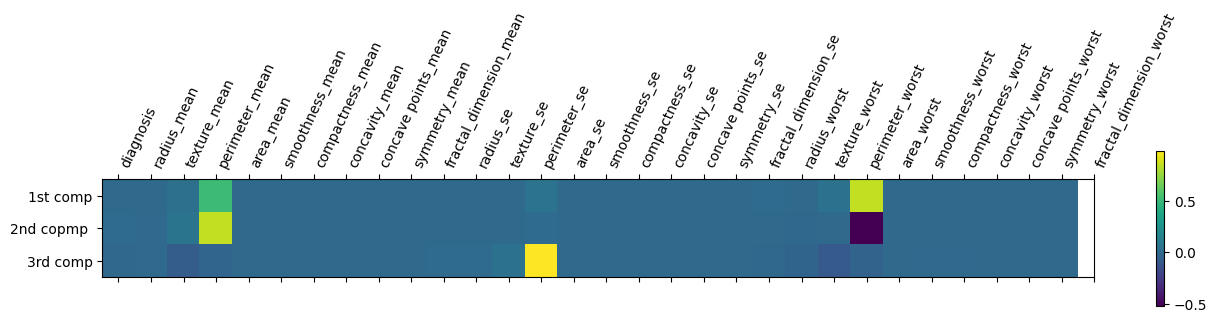

In [201]:
plt.matshow(pca.components_ , cmap='viridis' )
plt.yticks([0, 1, 2], ['1st comp' ,'2nd copmp ', '3rd comp'], fontsize=10)
plt.colorbar()
plt.xticks(range(len(data.columns)) , data.columns, rotation=65 , ha='left')
plt.tight_layout()
plt.show()

Text(0, 0.5, 'Eigenvalue')

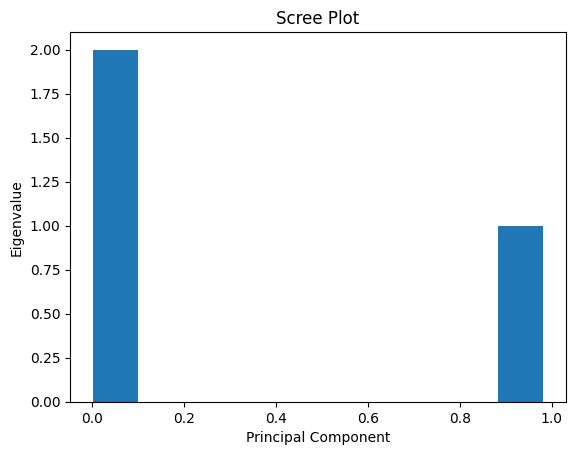

In [202]:
var= pca.explained_variance_ratio_
plt.hist(var)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')

In [203]:
var_pca=pd.DataFrame(pca.explained_variance_ratio_)
var_pca=var_pca.T
var_pca

0         1         2
0  0.982045  0.016176  0.001558

In [204]:
y_train

311    0
538    0
181    1
303    0
450    0
      ..
242    0
174    0
120    0
275    0
298    0
Name: diagnosis, Length: 398, dtype: int64

#LogisticRegression

y_train

In [205]:
log= LogisticRegression(random_state=18)
log.fit(x_train, y_train)
y_pred=log.predict(x_test)

print(log.score(x_train,y_train))
print(log.score(x_test,y_test))
print(classification_report(y_pred, y_test))

0.9899497487437185
0.9824561403508771
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       102
           1       0.97      0.99      0.98        69

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



#feature selection


Recursive Feature Elimination

In [206]:
x=data.drop('diagnosis',axis=1)
y=data['diagnosis']
x.shape

(569, 30)

In [207]:
# RFE
n=5
selector=RFE(log,n_features_to_select=n)
selector.fit(x , y)
selector_indices=selector.get_support(indices=True)
list_selected_feature1=x.columns[selector_indices]
list_selected_feature1

Index(['radius_mean', 'concavity_mean', 'radius_worst', 'compactness_worst',
       'concavity_worst'],
      dtype='object')

correlation-based Feature Selection

feature importance-based Selection


In [222]:
randfor=RandomForestClassifier()
#fit the randomforest on dataset
randfor.fit(x,y)
#get the feature importance
importance_features=randfor.feature_importances_
#we sort the feature importances
indices_fea=importance_features.argsort()[::-1]
# we set the k features on their importance scores
k=5
selected_indices_fea=indices_fea[:k]
#get the name of selected importance features
list_selected_feature2=x.columns[selected_indices_fea]
list_selected_feature2

Index(['radius_worst', 'concave points_worst', 'area_worst',
       'concave points_mean', 'perimeter_worst'],
      dtype='object')

Mutual information-based feature selection

In [223]:
# we set best k features using mutual information scoes
k=5
selector=SelectKBest(score_func=mutual_info_regression,k=k)
# fit selectore on data
selector.fit(x,y)
# get indices for selected features
selector_indices = selector.get_support(indices=True)
# get the name of selected features
list_selected_feature3=x.columns[selector_indices]
list_selected_feature3

Index(['concave points_mean', 'radius_worst', 'perimeter_worst', 'area_worst',
       'concave points_worst'],
      dtype='object')

#combining all of the features

In [224]:
all_features=[]
list_selcted_features=[list_selected_feature1,list_selected_feature2,list_selected_feature3]
for i in range(len(list_selcted_features)):
  all_features.extend(list_selcted_features[i])

all_features

['radius_mean',
 'concavity_mean',
 'radius_worst',
 'compactness_worst',
 'concavity_worst',
 'radius_worst',
 'concave points_worst',
 'area_worst',
 'concave points_mean',
 'perimeter_worst',
 'concave points_mean',
 'radius_worst',
 'perimeter_worst',
 'area_worst',
 'concave points_worst']

In [225]:
X=x[all_features]
X

radius_mean  concavity_mean  radius_worst  compactness_worst  \
0          17.99         0.30010        25.380            0.66560   
1          20.57         0.08690        24.990            0.18660   
2          19.69         0.19740        23.570            0.42450   
3          11.42         0.24140        14.910            0.86630   
4          20.29         0.19800        22.540            0.20500   
..           ...             ...           ...                ...   
564        21.56         0.24390        25.450            0.21130   
565        20.13         0.14400        23.690            0.19220   
566        16.60         0.09251        18.980            0.30940   
567        20.60         0.35140        25.740            0.86810   
568         7.76         0.00000         9.456            0.06444   

     concavity_worst  radius_worst  concave points_worst  area_worst  \
0             0.7119        25.380                0.2654      2019.0   
1             0.2416        24.990                0.1860      1956.0   
2             0.4504        23.570                0.2430      1709.0   
3             0.6869        14.910                0.2575       567.7   
4             0.4000        22.540                0.1625      1575.0   
..               ...           ...                   ...         ...   
564           0.4107        25.450                0.2216      2027.0   
565           0.3215        23.690                0.1628      1731.0   
566           0.3403        18.980                0.1418      1124.0   
567           0.9387        25.740                0.2650      1821.0   
568           0.0000         9.456                0.0000       268.6   

     concave points_mean  perimeter_worst  concave points_mean  radius_worst  \
0                0.14710           184.60              0.14710        25.380   
1                0.07017           158.80              0.07017        24.990   
2                0.12790           152.50              0.12790        23.570   
3                0.10520            98.87              0.10520        14.910   
4                0.10430           152.20              0.10430        22.540   
..                   ...              ...                  ...           ...   
564              0.13890           166.10              0.13890        25.450   
565              0.09791           155.00              0.09791        23.690   
566              0.05302           126.70              0.05302        18.980   
567              0.15200           184.60              0.15200        25.740   
568              0.00000            59.16              0.00000         9.456   

     perimeter_worst  area_worst  concave points_worst  
0             184.60      2019.0                0.2654  
1             158.80      1956.0                0.1860  
2             152.50      1709.0                0.2430  
3              98.87       567.7                0.2575  
4             152.20      1575.0                0.1625  
..               ...         ...                   ...  
564           166.10      2027.0                0.2216  
565           155.00      1731.0                0.1628  
566           126.70      1124.0                0.1418  
567           184.60      1821.0                0.2650  
568            59.16       268.6                0.0000  

[569 rows x 15 columns]

In [226]:
X.shape

(569, 15)

we divided our data to 20%  test and 80%  train

In [227]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=18)
x_test.shape

(114, 15)

<Axes: >

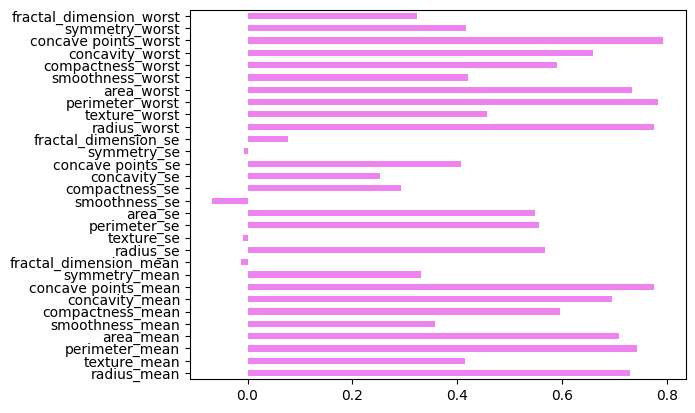

In [228]:
data.drop('diagnosis',axis=1).corrwith(data['diagnosis']).plot(kind='barh',color='violet')

#functions

###confusion matrix

    Accuracy : (TP +TN) / (TP + TN + FP +FN)
    Precision : TP / (TP + FP)
    Recall : TP / (TP + FN)
    #lets define some functions
in this part we measure performance of models: persision, roc curve

In [229]:
def prepare_model(algorithm):
    model = algorithm
    model.fit(x_train , y_train)
    return model

In [230]:
def prepare_confusion_matrix(algorithm, model):
    print(algorithm)
    plt.figure(figsize=(10,5))
    pred = model.predict(x_test)
    cm = confusion_matrix(y_test, pred)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, fmt='g', ax=ax)
    plt.show()

    # labels, title and ticks
    ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
    ax.set_title('Confusion Matrix');


In [231]:
def prepare_classification_report(algorithm, model):
    print(algorithm+' Report :')
    pred = model.predict(x_test)
    print(classification_report(y_test, pred))

In [232]:
def prepare_roc_curve(algorithm, model):
    print(algorithm)
    y_pred_proba = model.predict_proba(x_test)[::,1]
    fpr, tpr, thresholds = roc_curve(y_test,  y_pred_proba)
    roc_auc = auc(fpr, tpr)
    curve = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
    curve.plot()
    plt.show()

In [247]:
algorithms = [('LOR', LogisticRegression(random_state=18)),
              ('svm', SVC(probability=True,random_state=18)),
              ('RF', RandomForestClassifier(random_state=18)),
              ('GB', GradientBoostingClassifier(random_state=18)),
             ]
trained_models = []
model_and_score = {}

for index, tup in enumerate(algorithms):
    model = prepare_model(tup[1])
    model_and_score[tup[0]] =str(model.score(x_test,y_test)*100)+"%"
    trained_models.append((tup[0],model))
print(model_and_score)

{'LOR': '92.98245614035088%', 'svm': '89.47368421052632%', 'RF': '93.85964912280701%', 'GB': '92.10526315789474%'}


LOR


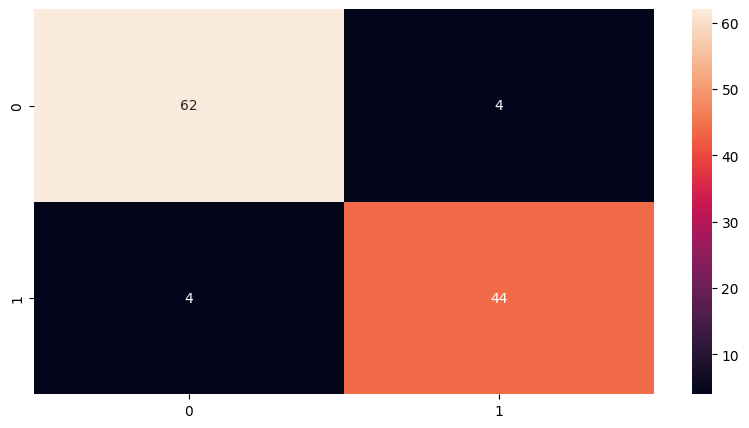

svm


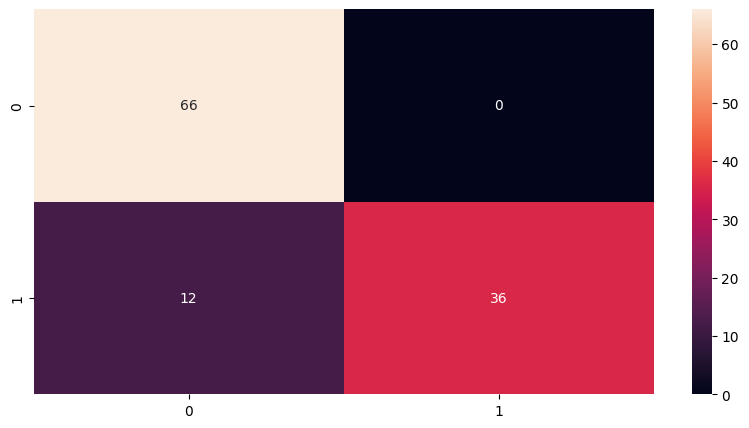

RF


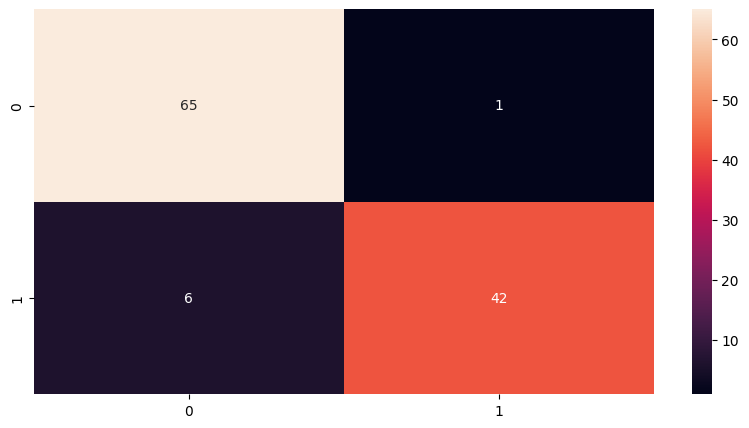

GB


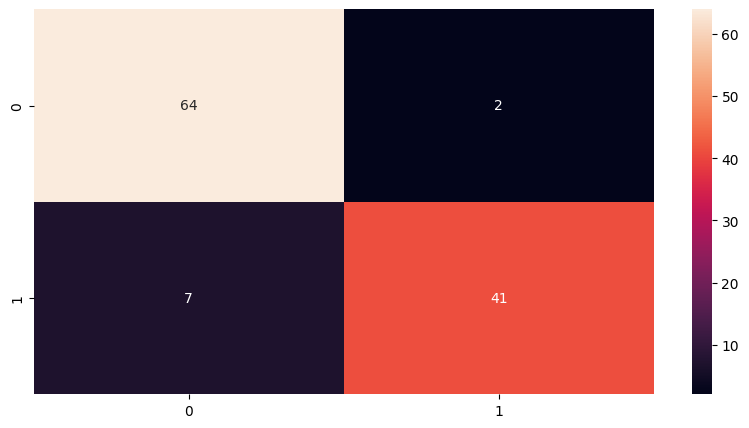

In [242]:
for index, tup in enumerate(trained_models):
    prepare_confusion_matrix(tup[0], tup[1])

In [243]:
for index, tup in enumerate(trained_models):
    prepare_classification_report(tup[0], tup[1])
    print("\n")

LOR Report :
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        66
           1       0.92      0.92      0.92        48

    accuracy                           0.93       114
   macro avg       0.93      0.93      0.93       114
weighted avg       0.93      0.93      0.93       114



svm Report :
              precision    recall  f1-score   support

           0       0.85      1.00      0.92        66
           1       1.00      0.75      0.86        48

    accuracy                           0.89       114
   macro avg       0.92      0.88      0.89       114
weighted avg       0.91      0.89      0.89       114



RF Report :
              precision    recall  f1-score   support

           0       0.92      0.98      0.95        66
           1       0.98      0.88      0.92        48

    accuracy                           0.94       114
   macro avg       0.95      0.93      0.94       114
weighted avg       0.94      0.9

LOR


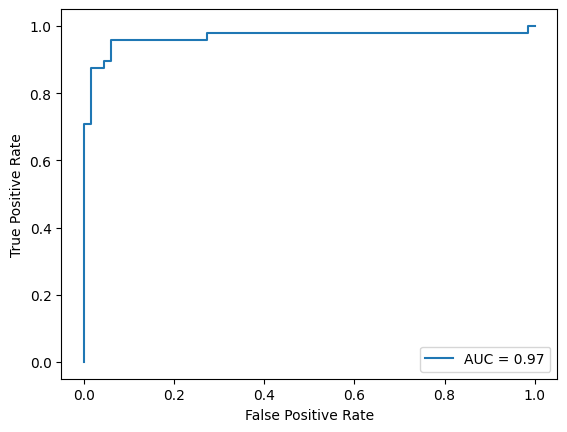

svm


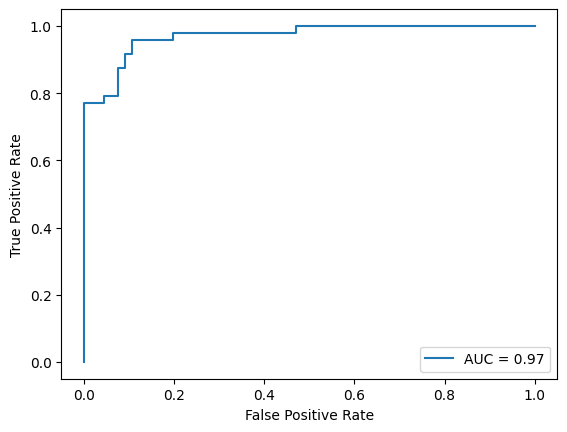

RF


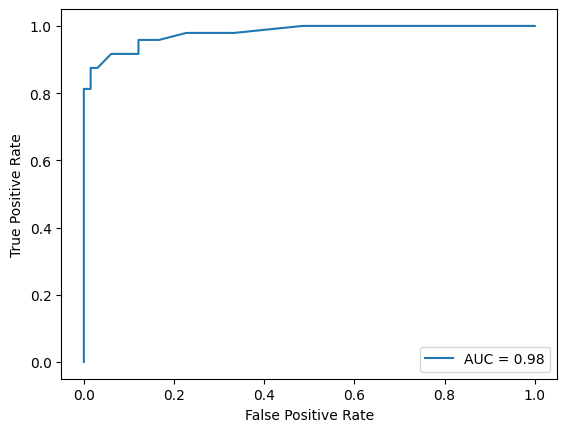

GB


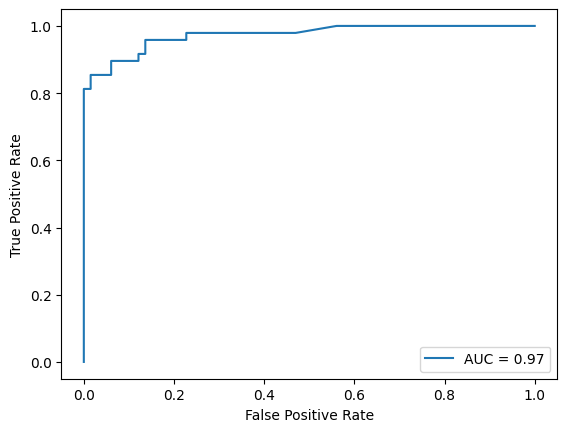

In [244]:
encoder = LabelEncoder()
y_test = encoder.fit_transform(y_test)

for index, tup in enumerate(trained_models):
    prepare_roc_curve(tup[0], tup[1])

